# Sentiment Analysis

In [3]:
#import packages

import pandas as pd
from textblob_de import TextBlobDE as TextBlob
import numpy as np
from tqdm.notebook import tqdm

tqdm.pandas()

#read in Twitter data
#load in the preprocessed data
import pickle

pre_data_twitter= pickle.load(open('../data/processed/tweets_processed.p','rb'))
pre_data_speeches= pickle.load(open('../data/processed/speeches_processed.p','rb'))
pre_data_twitter.head()

full_name        date party  \
0  Ralph Brinkhaus  2021-06-15   CDU   
1  Ralph Brinkhaus  2021-06-11   CDU   
2  Ralph Brinkhaus  2021-06-11   CDU   
3  Ralph Brinkhaus  2021-06-11   CDU   
4  Ralph Brinkhaus  2021-06-11   CDU   

                                   text_preprocessed  \
0  [fußballfans, freuen, spiel, nationalmannschaf...   
1  [außenpolitik, wirtschaftlich, souveränität, d...   
2  [nachhaltig, klimawandel, kämpfen, brauchen, a...   
3  [brauchen, pandemie, bezahlen, arbeitsplätze, ...   
4  [wahldebatte, thema, zukunft, passieren, coron...   

                          text_preprocessed_sentence  
0  fußballfans freuen spiel nationalmannschaft dr...  
1  außenpolitik wirtschaftlich souveränität digit...  
2  nachhaltig klimawandel kämpfen brauchen akzept...  
3  brauchen pandemie bezahlen arbeitsplätze digit...  
4  wahldebatte thema zukunft passieren corona sta...

## Sentiment Analysis for Twitter Data

In [2]:
#loop through all the politicians we want to analyze
data=[]

for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get tweets from the specific politician and from the desired period
    tweets_analyzing =pre_data_twitter.loc[pre_data_twitter['full_name']==name]
    #tweets_analyzing1 =tweets_analyzing.loc[tweets_analyzing['date']>='2017-10-24']
    #tweets_analyzing2 =tweets_analyzing1.loc[tweets_analyzing1['date']<='2021-10-26']
    #preprocess the tweets
    test_tweets =tweets_analyzing.text_preprocessed
    #test_tweets = tweets.progress_apply(nlp_twitter)
    #create sentiment scores
    preprocess=[]
    for item in test_tweets:
        preprocess.append(' '.join([word for word in item]))

    preprocessed=pd.DataFrame(preprocess)

    blobs=tweets_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the means and medians of both values 
    p_mean = np.mean(polarity)
    
    #get the number of positive, neutral and negative tweets
    positive_p=0
    neutral_p=0
    negative_p=0
    for item_p in polarity:
        if item_p>0:
            positive_p += 1
        elif item_p<0:
            negative_p += 1
        else:
            neutral_p += 1
    #set up list to secure the values generated
    data.append([name,p_mean,positive_p,neutral_p,negative_p]) 


  0%|          | 0/42 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [21]:
#set up dataframe with all values
dataf = pd.DataFrame(data, columns=['Name','Polarity_mean','Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets'])
display(dataf)
dataf.to_csv('sentiment_scores_twitter_01.csv')

Name  Polarity_mean  Num_pos_tweets  \
0                 Ralph Brinkhaus       0.378310             201   
1                   Hermann Gröhe       0.261686             318   
2                    Nadine Schön       0.279646             140   
3                 Norbert Röttgen       0.300235            1234   
4                  Peter Altmaier       0.206058             362   
5                      Jens Spahn       0.368972             673   
6                  Matthias Hauer       0.096032            2611   
7               Christian Lindner       0.149280            1540   
8                 Marco Buschmann       0.086243            3842   
9         Bettina Stark-Watzinger       0.193342             981   
10      Alexander Graf Lambsdorff       0.179456            1144   
11                 Johannes Vogel       0.200989            2113   
12               Konstantin Kuhle       0.087109            1137   
13  Marie-Agnes Strack-Zimmermann       0.148520            1690   
14                 Lars Klingbeil       0.194094             691   
15                   Saskia Esken       0.105805            5070   
16                  Hubertus Heil       0.311845             362   
17                     Heiko Maas       0.234573            1139   
18                  Martin Schulz       0.289313             163   
19                  Karamba Diaby       0.118207             212   
20                Karl Lauterbach       0.048366            2798   
21                   Steffi Lemke       0.125333             326   
22                    Cem Özdemir       0.183066            1182   
23          Katrin Göring-Eckardt       0.201698            1151   
24            Konstantin von Notz       0.041054             927   
25               Britta Haßelmann       0.098267            1250   
26                   Sven Lehmann       0.153065            1264   
27              Annalena Baerbock       0.270360             477   
28              Sahra Wagenknecht      -0.043654             302   
29                Bernd Riexinger       0.022502             907   
30                 Niema Movassat      -0.025738            2923   
31                      Jan Korte       0.072377             473   
32                Dietmar Bartsch       0.083904            1025   
33                    Gregor Gysi       0.053338             152   
34                 Sevim Dağdelen      -0.039255             336   
35                   Alice Weidel      -0.051704             517   
36             Beatrix von Storch      -0.023252             746   
37                    Joana Cotar       0.046397            1546   
38               Stephan Brandner       0.011048            2343   
39                 Tino Chrupalla       0.012713             234   
40                  Götz Frömming      -0.016453            1800   
41                 Leif-Erik Holm      -0.029120             184   

    Num_neutral_tweets  Num_neg_tweets  
0                  122              37  
1                  292              94  
2                  152              33  
3                  697             409  
4                  434             133  
5                  362             131  
6                 4368            1630  
7                 1969             781  
8                 6255            2453  
9                  819             452  
10                1087             551  
11                2957             706  
12                1951             769  
13                1730             910  
14                1069             236  
15                8963            2894  
16                 383              67  
17                 593             513  
18                  64              60  
19                 249             132  
20                1680            2353  
21                 464             185  
22                 872             617  
23                1352             466  
24                1584             777  
25                1516             824

In [22]:
#compute the mean for Polarity and sum over number of tweets from the six parties represented
CDU_polarity = np.mean(dataf['Polarity_mean'][0:7])
print('CDU Sentiment: ',CDU_polarity)
FDP_polarity = np.mean(dataf['Polarity_mean'][7:14])
print('FDP Sentiment: ',FDP_polarity)
SPD_polarity = np.mean(dataf['Polarity_mean'][14:21])
print('SPD Sentiment: ',SPD_polarity)
GRUENE_polarity = np.mean(dataf['Polarity_mean'][21:28])
print('GRUENE Sentiment: ',GRUENE_polarity)
LINKE_polarity = np.mean(dataf['Polarity_mean'][28:35])
print('LINKE Sentiment: ',LINKE_polarity)
AFD_polarity = np.mean(dataf['Polarity_mean'][35:42])
print('AFD Sentiment: ',AFD_polarity)
print( )

for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    CDU_cat = np.sum(dataf[category][0:7])
    print('CDU ',category,': ',CDU_cat)
    FDP_cat = np.sum(dataf[category][7:14])
    print('FDP ',category,': ',FDP_cat)
    SPD_cat = np.sum(dataf[category][14:21])
    print('SPD ',category,': ',SPD_cat)
    GRUENE_cat = np.sum(dataf[category][21:28])
    print('GRUENE ',category,': ',GRUENE_cat)
    LINKE_cat = np.sum(dataf[category][28:35])
    print('LINKE ',category,': ',LINKE_cat)
    AFD_cat = np.sum(dataf[category][35:42])
    print('AFD ',category,': ',AFD_cat)
    print( )

CDU Sentiment:  0.2701342852272904
FDP Sentiment:  0.14927704354436228
SPD Sentiment:  0.18602910130679945
GRUENE Sentiment:  0.15326341675108268
LINKE Sentiment:  0.01763933986685002
AFD Sentiment:  -0.007195947721027965

CDU  Num_pos_tweets :  5539
FDP  Num_pos_tweets :  12447
SPD  Num_pos_tweets :  10435
GRUENE  Num_pos_tweets :  6577
LINKE  Num_pos_tweets :  6118
AFD  Num_pos_tweets :  7370

CDU  Num_neutral_tweets :  6427
FDP  Num_neutral_tweets :  16768
SPD  Num_neutral_tweets :  13001
GRUENE  Num_neutral_tweets :  7534
LINKE  Num_neutral_tweets :  8167
AFD  Num_neutral_tweets :  15543

CDU  Num_neg_tweets :  2467
FDP  Num_neg_tweets :  6622
SPD  Num_neg_tweets :  6255
GRUENE  Num_neg_tweets :  3700
LINKE  Num_neg_tweets :  6066
AFD  Num_neg_tweets :  7260



In [23]:
#compute the mean for Polarity and sum over number of tweets for male and female politicians
female_polarity= np.mean(dataf.loc[dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Female Sentiment:',female_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    female_cat = np.sum(dataf.loc[dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Female ',category,': ',female_cat)

male_polarity= np.mean(dataf.loc[~dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Male Sentiment:',male_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    male_cat = np.sum(dataf.loc[~dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Male ',category,': ',male_cat)

Female Sentiment: 0.10096327301976367
Female  Num_pos_tweets :  11847
Female  Num_neutral_tweets :  16402
Female  Num_neg_tweets :  7394
Male Sentiment: 0.13561700653483708
Male  Num_pos_tweets :  36639
Male  Num_neutral_tweets :  51038
Male  Num_neg_tweets :  24976


  0%|          | 0/42 [00:00<?, ?it/s]

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


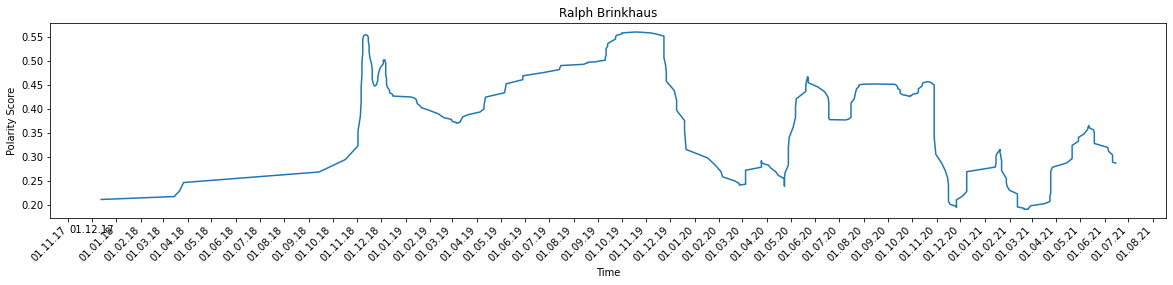

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


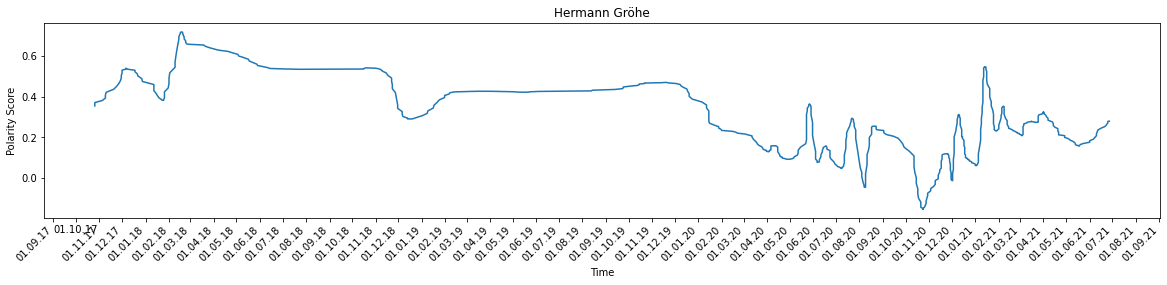

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


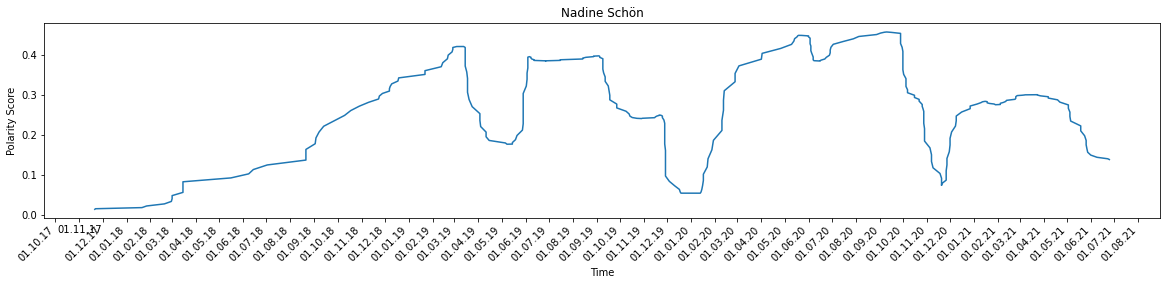

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


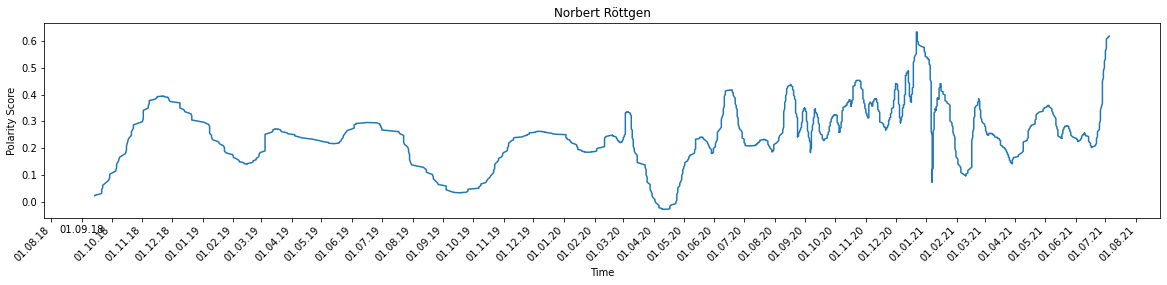

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


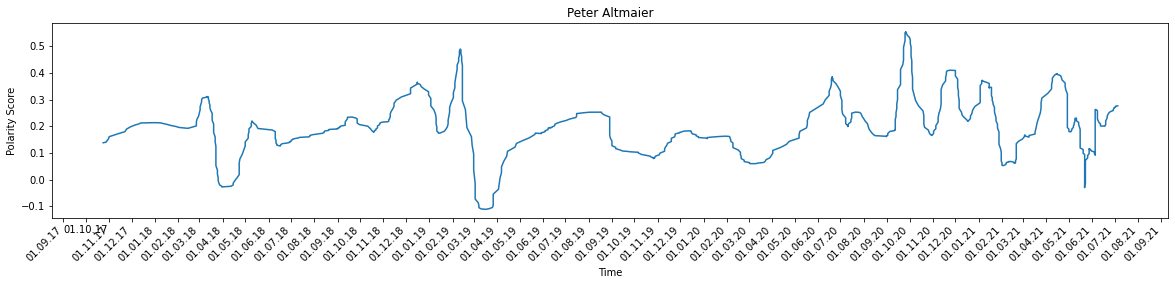

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


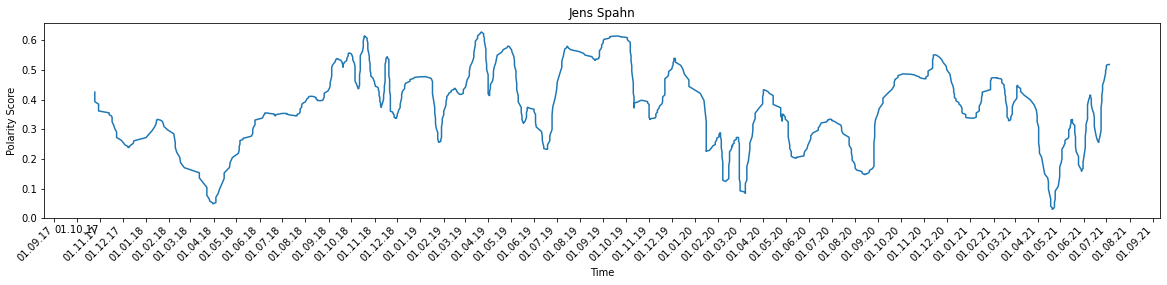

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


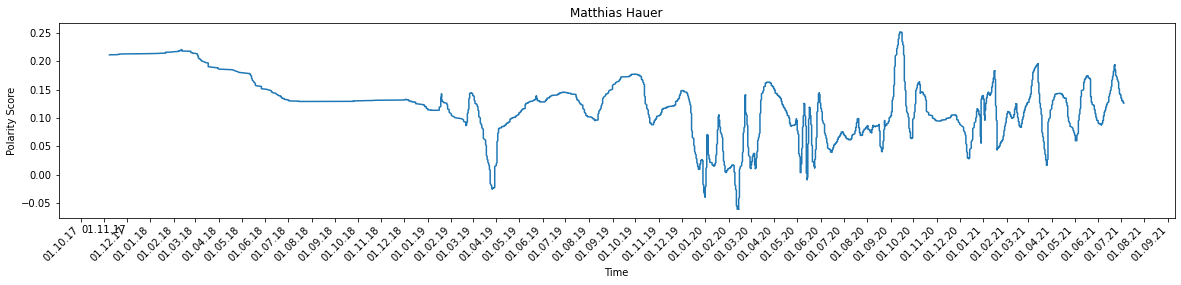

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


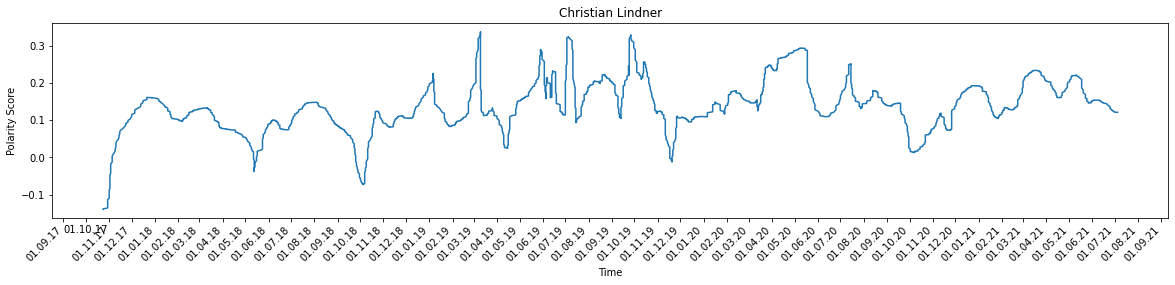

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


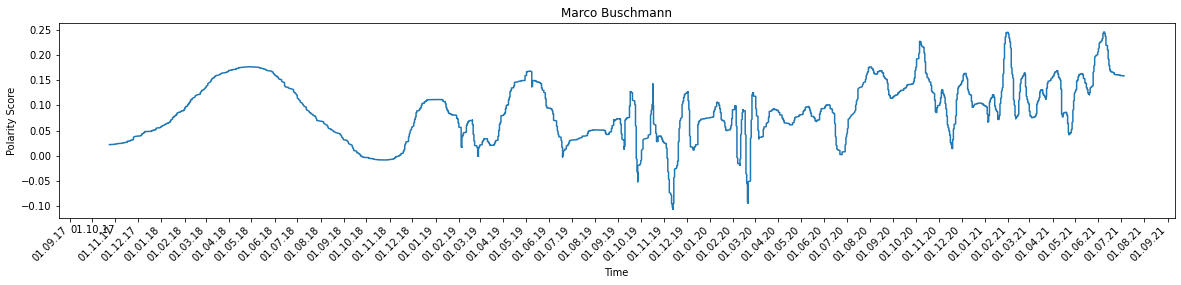

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


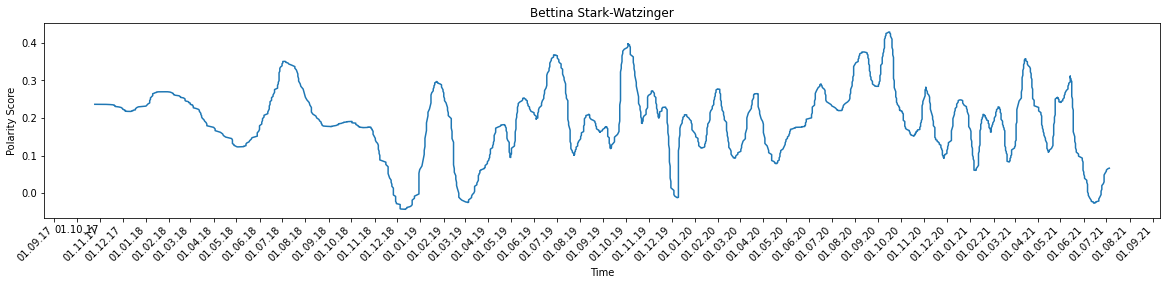

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


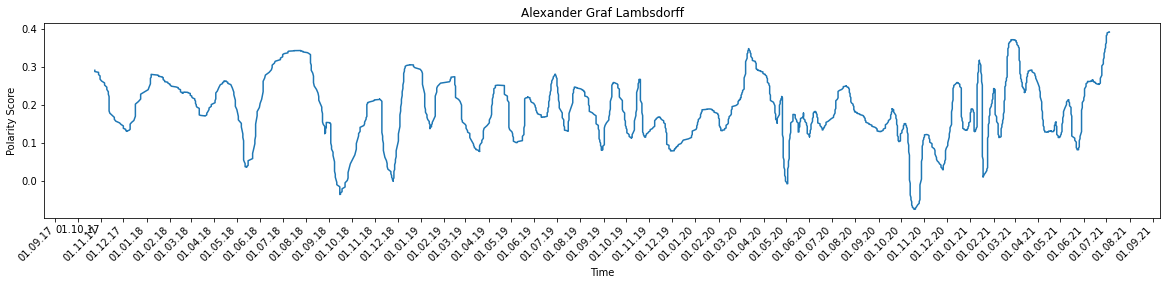

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


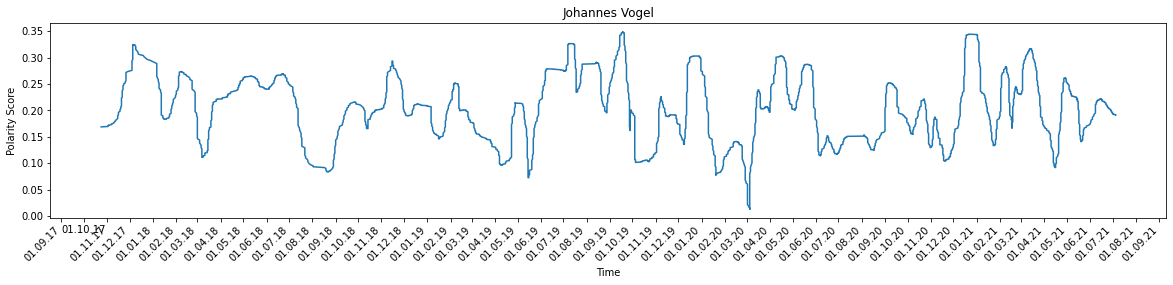

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


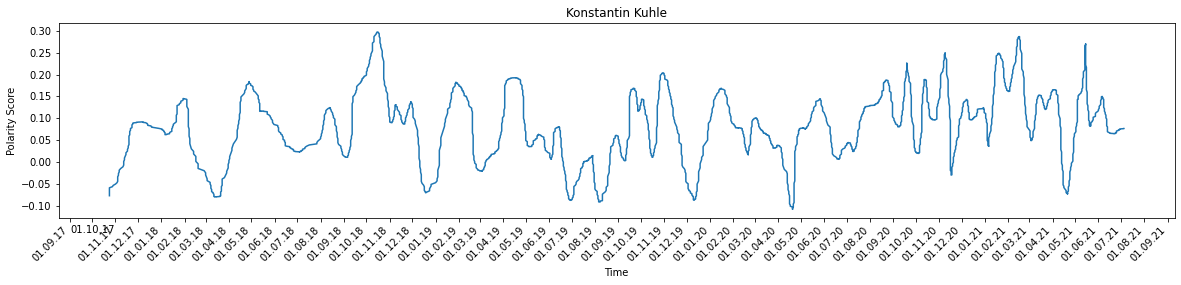

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


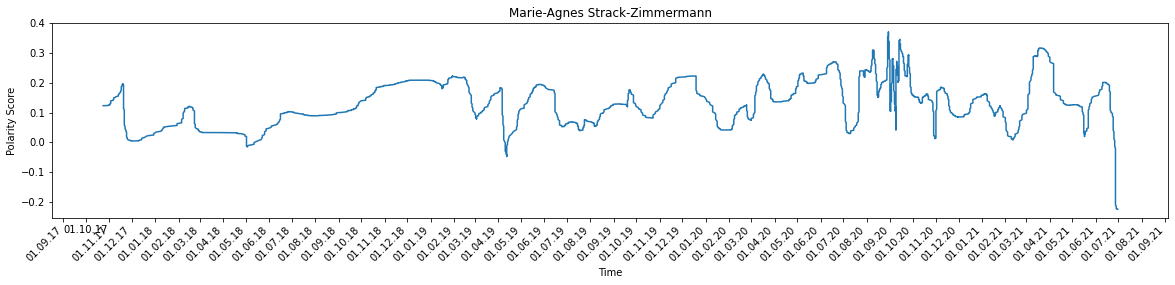

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


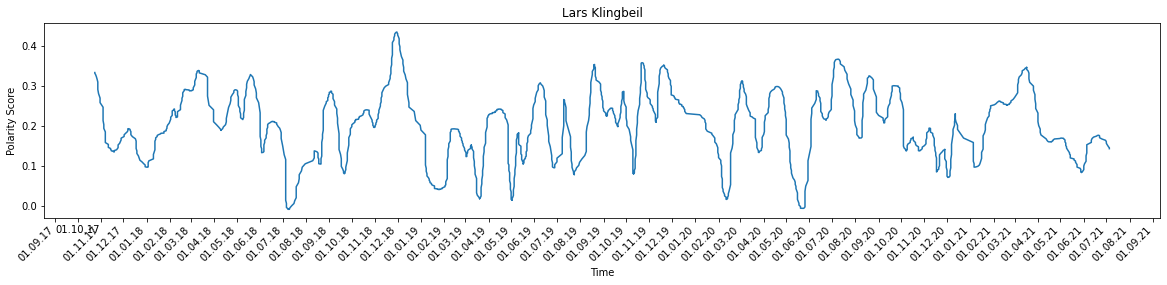

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


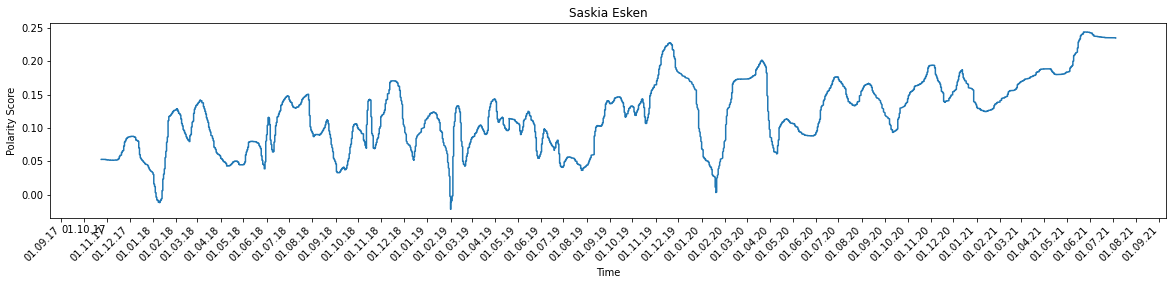

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


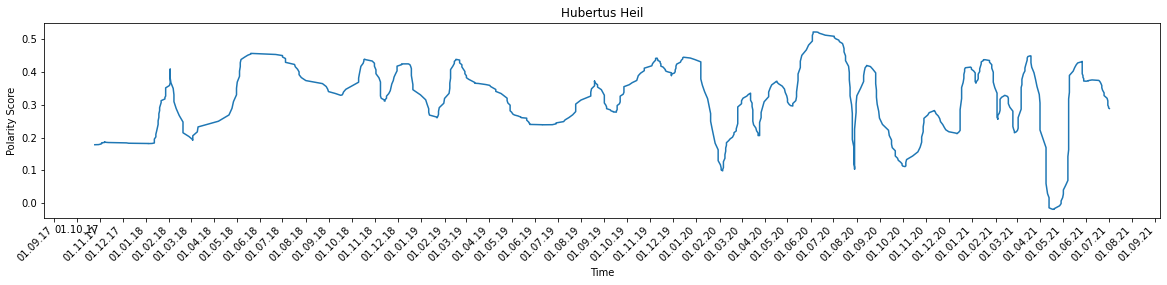

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


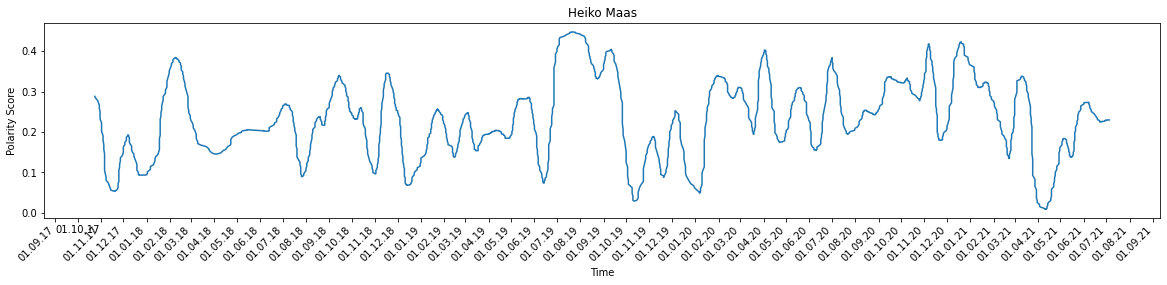

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


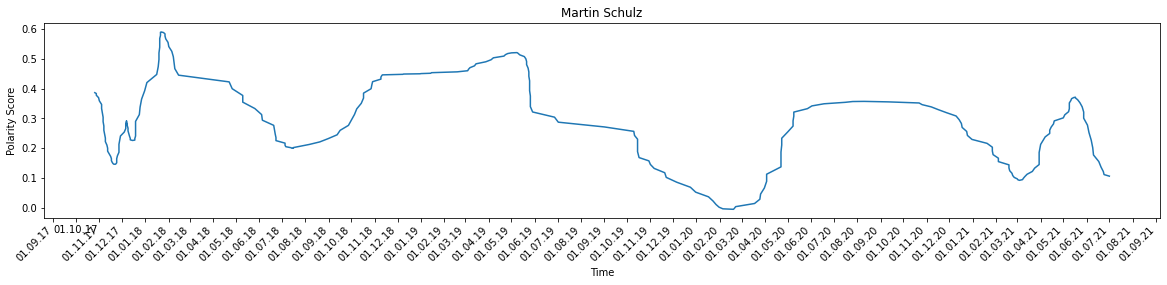

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


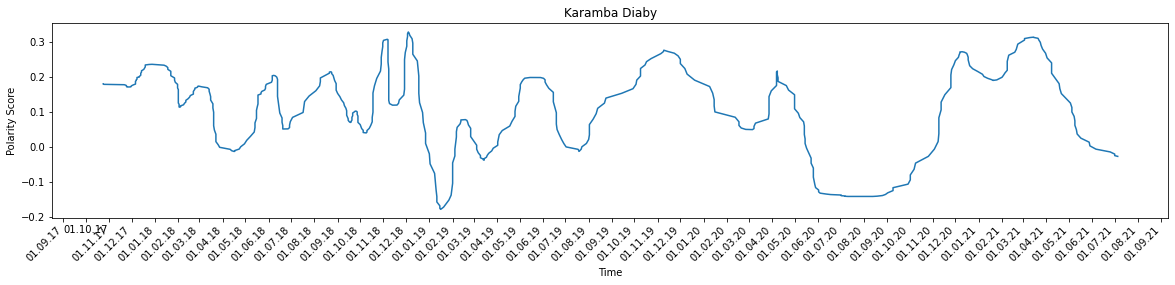

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


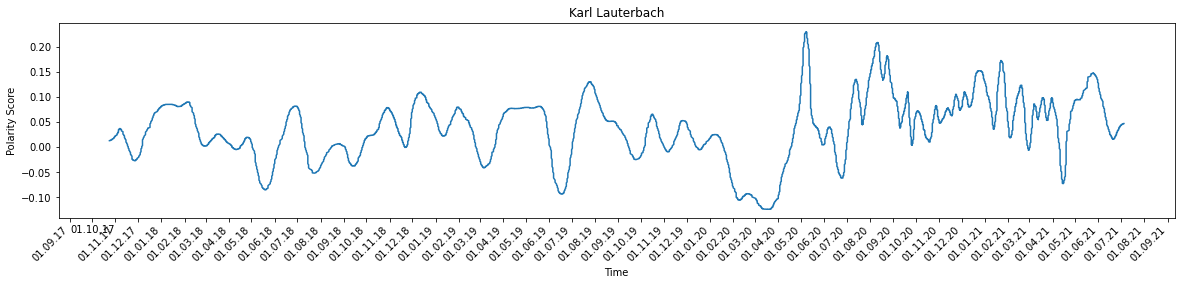

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


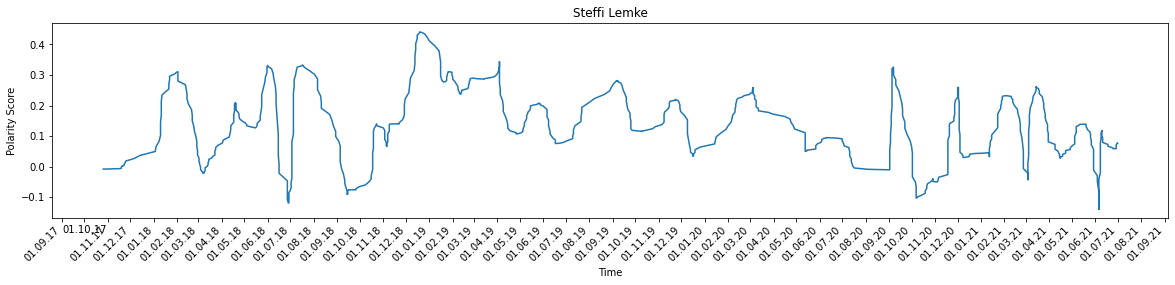

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


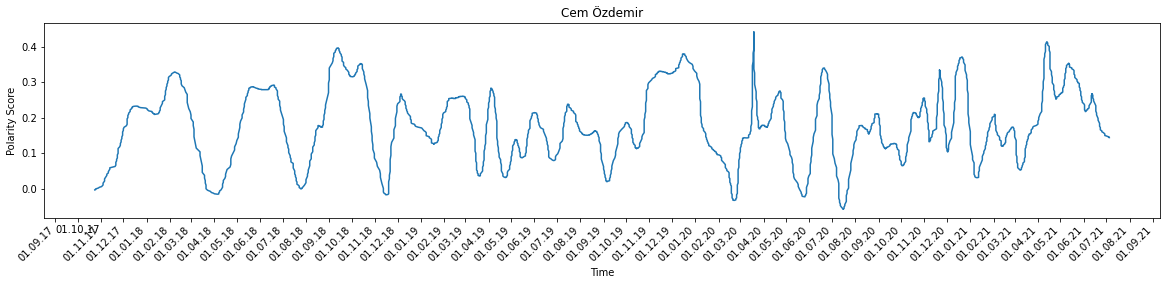

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


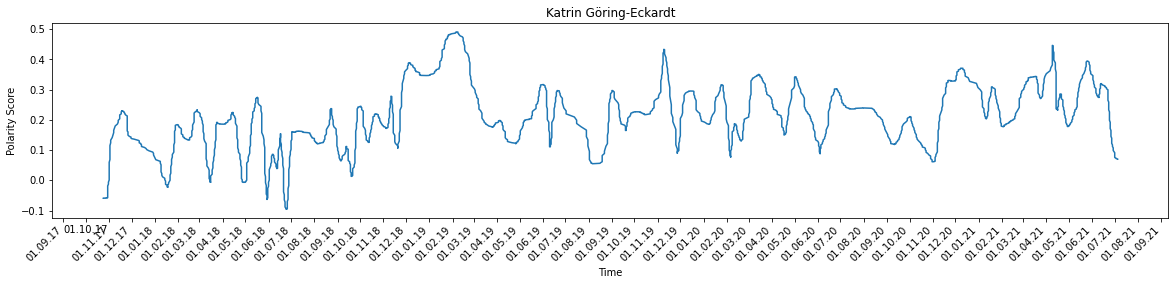

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


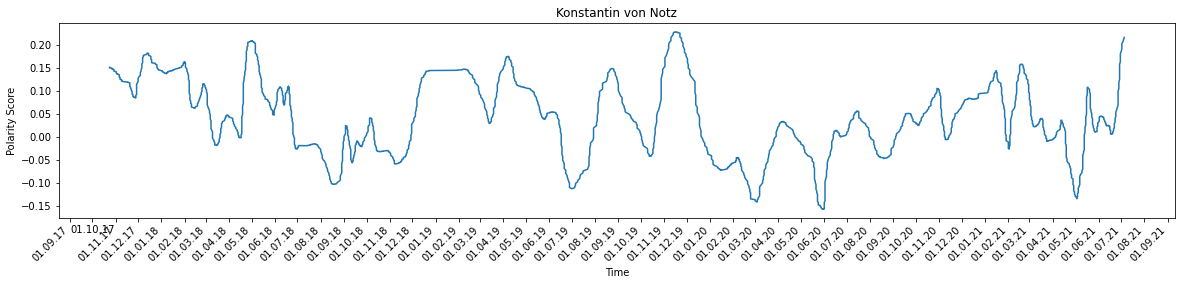

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


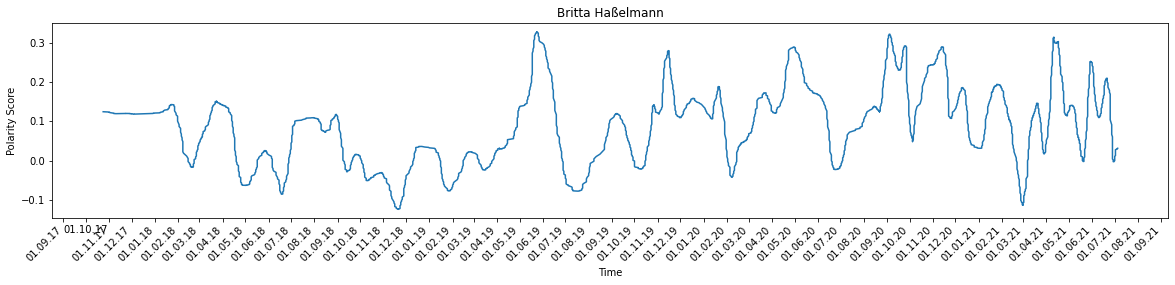

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


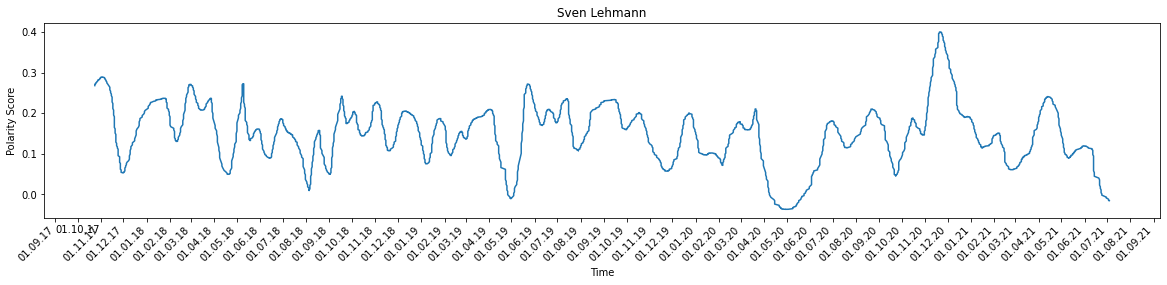

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


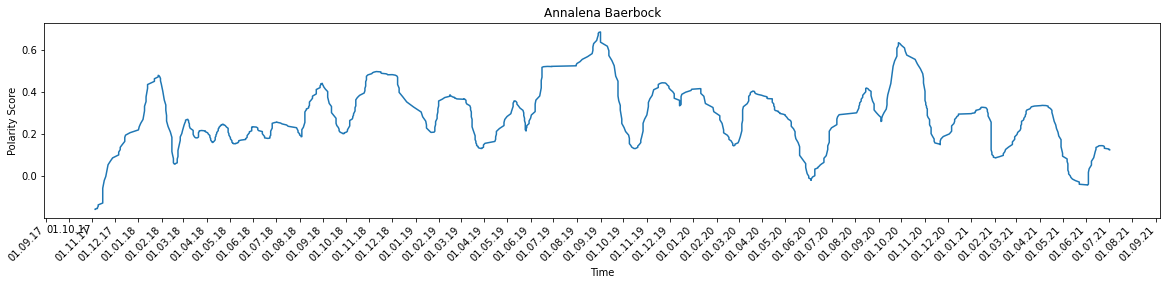

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


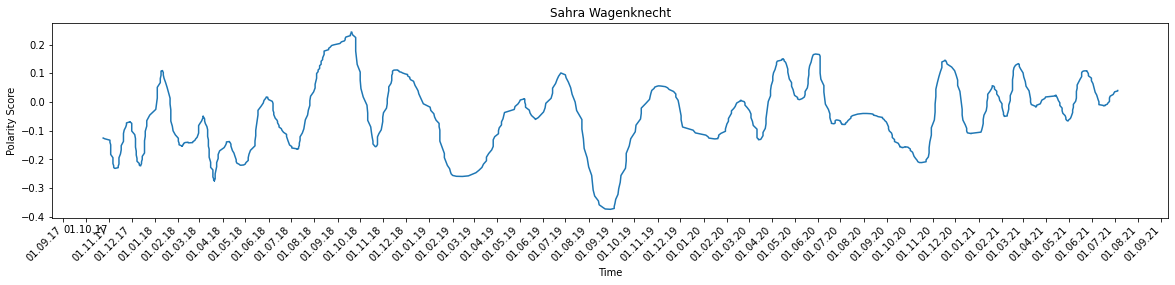

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


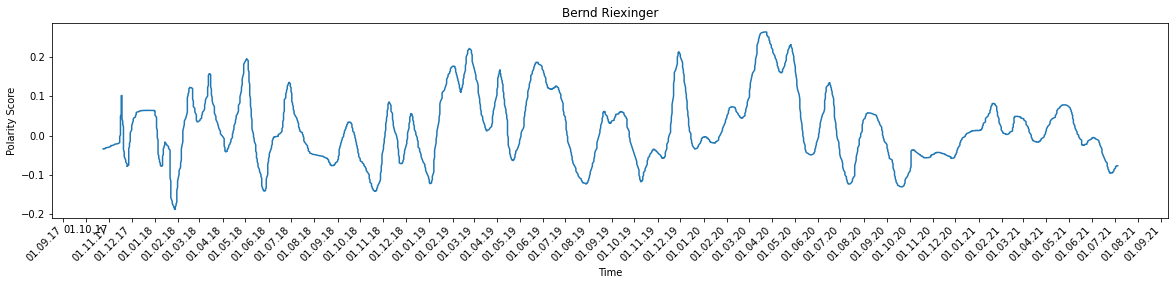

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


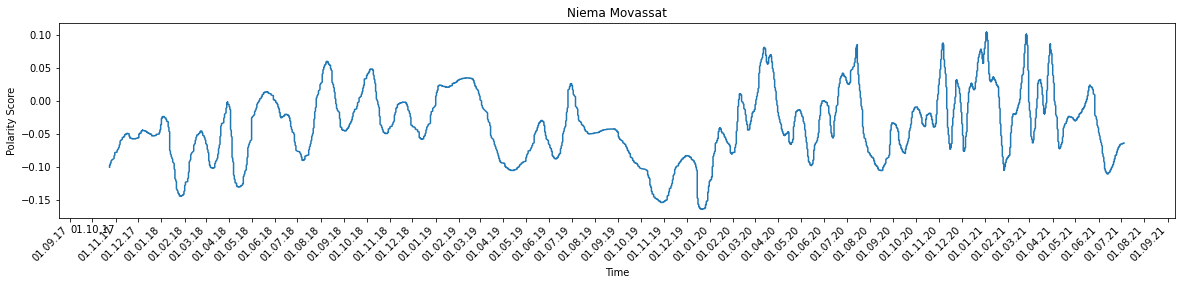

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


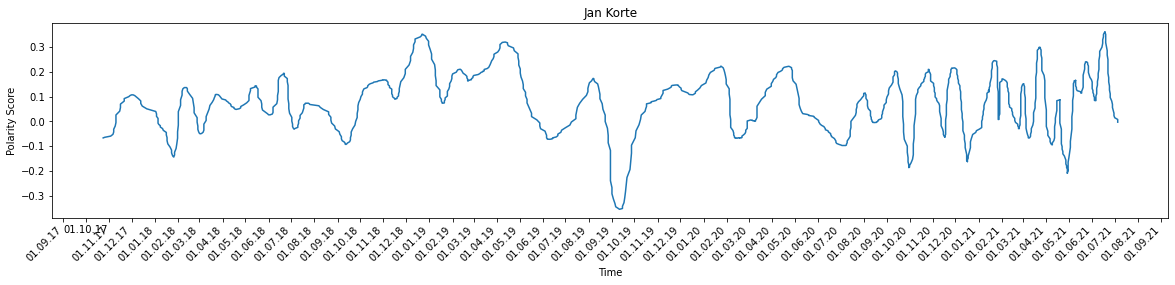

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


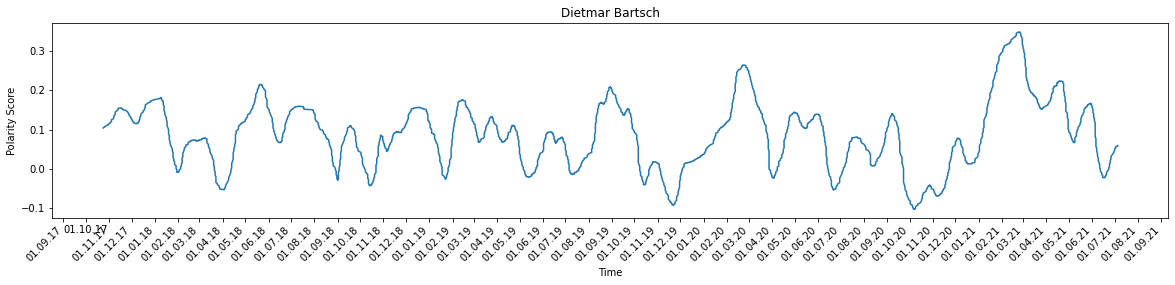

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


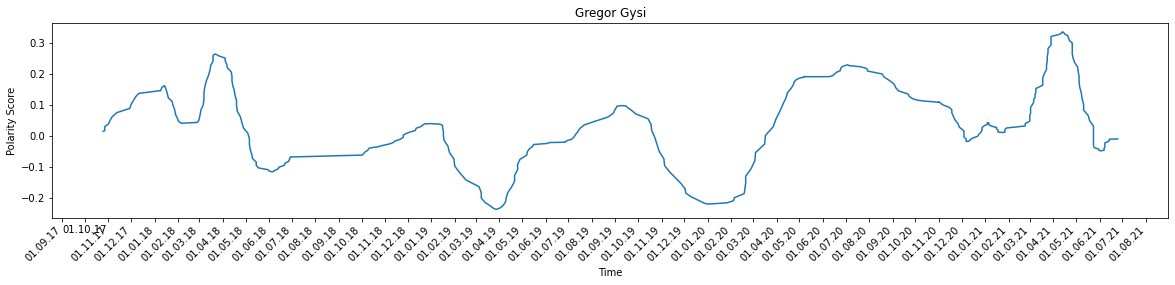

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


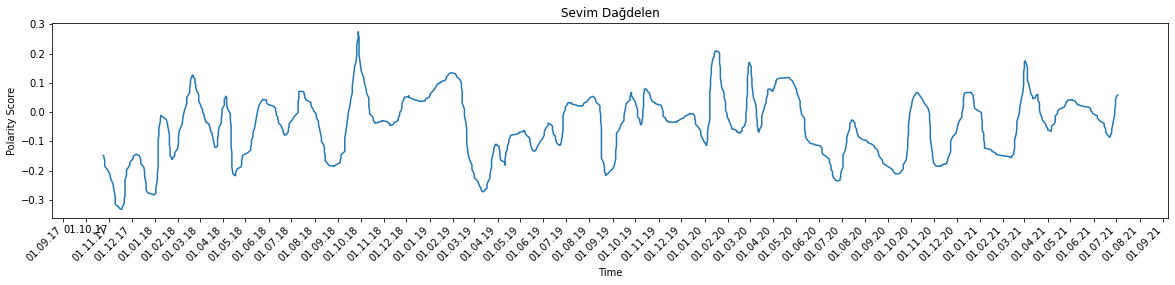

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


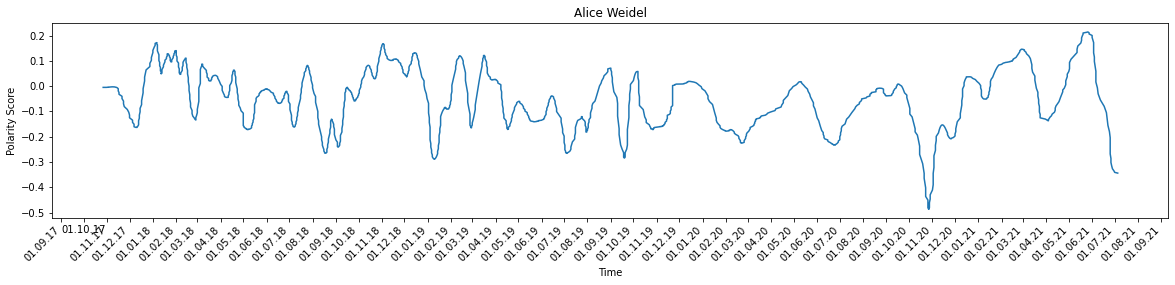

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


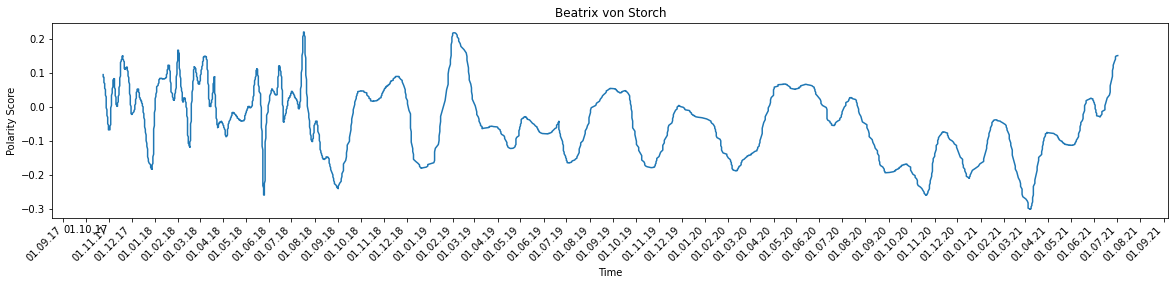

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


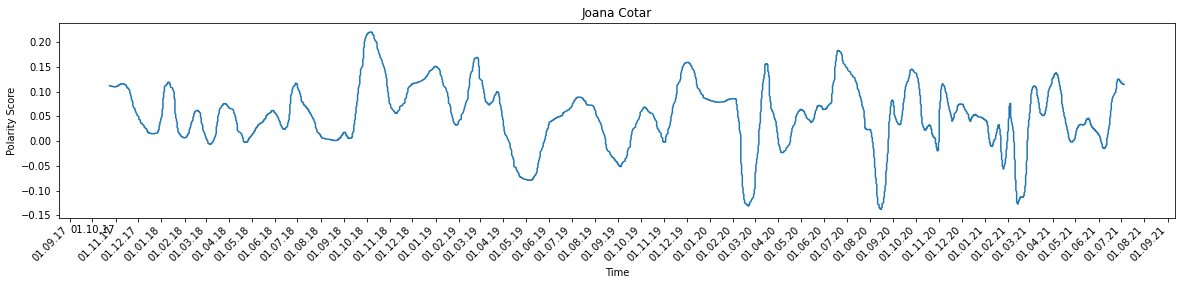

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


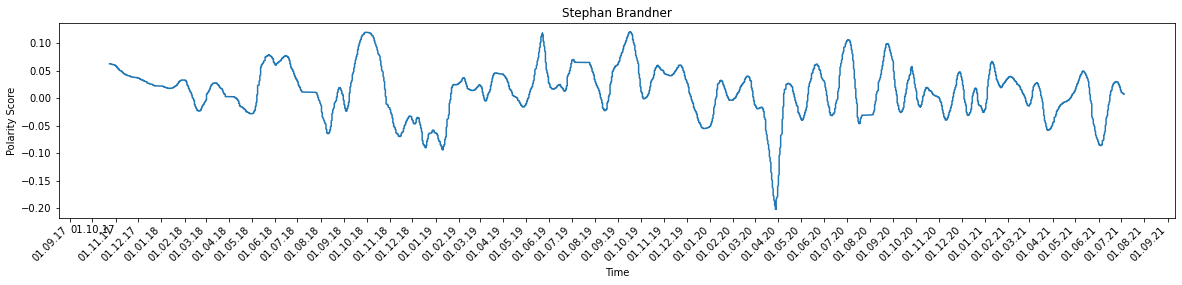

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


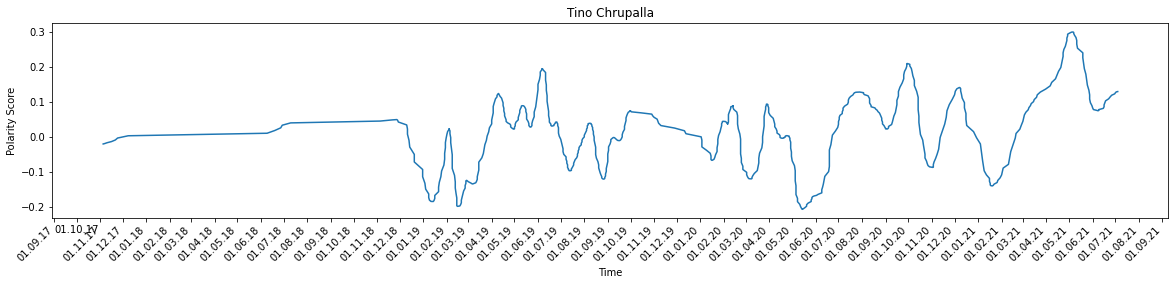

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


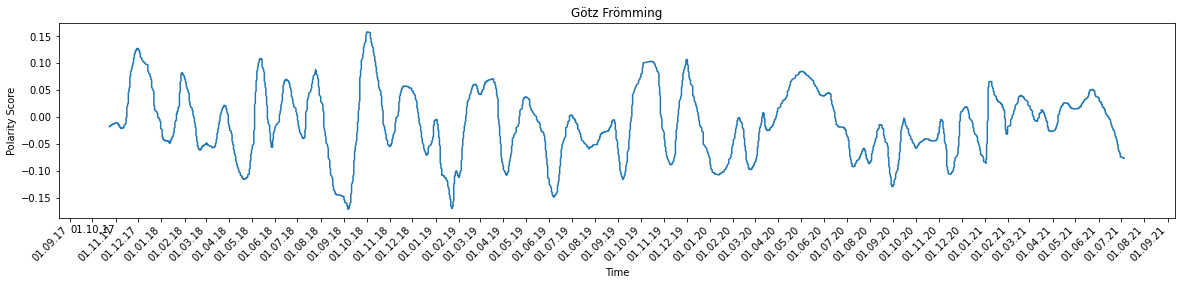

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1512815974.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


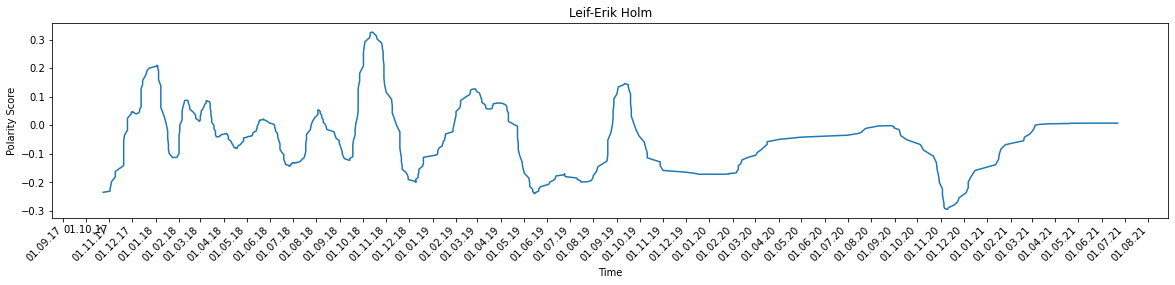

In [25]:
#plot the polarity of tweets over time
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

i=1
for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get tweets from the specific politician and from the desired period
    tweets_analyzing =pre_data_twitter.loc[pre_data_twitter['full_name']==name]
    #tweets_analyzing1 =tweets_analyzing.loc[tweets_analyzing['Datetime']>='2017-10-24']
    #tweets_analyzing2 =tweets_analyzing1.loc[tweets_analyzing1['Datetime']<='2021-10-26']
    #preprocess the tweets
    test_tweets =tweets_analyzing.text_preprocessed
    #test_tweets = tweets.progress_apply(nlp_twitter)
    #create sentiment scores
    preprocess=[]
    for item in test_tweets:
        preprocess.append(' '.join([word for word in item]))

    preprocessed=pd.DataFrame(preprocess)

    blobs=tweets_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the desired dates and convert timestamp
    tweets_analyzing['polarity']=polarity
    tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])

    dates=tweets_analyzing['date']
    values=tweets_analyzing['polarity']

    #smooth the curve, higher sigma means more smoothing
    if len(polarity)>18999:
        s=100
    elif len(polarity)>17999:
        s=95
    elif len(polarity)>16999:
        s=90
    elif len(polarity)>15999:
        s=85
    elif len(polarity)>14999:
        s=80
    elif len(polarity)>13999:
        s=75
    elif len(polarity)>12999:
        s=70
    elif len(polarity)>11999:
        s=65
    elif len(polarity)>10999:
        s=60
    elif len(polarity)>9999:
        s=55
    elif len(polarity)>8999:
        s=50
    elif len(polarity)>7999:
        s=45
    elif len(polarity)>6999:
        s=40
    elif len(polarity)>5999:
        s=35
    elif len(polarity)>4999:
        s=30
    elif len(polarity)>3999:
        s=25
    elif len(polarity)>2999:
        s=20
    elif len(polarity)>1999:
        s=15
    elif len(polarity)>1399:
        s=10
    else:
        s=8
    ysmoothed = gaussian_filter1d(values, sigma=s)

    fig = plt.figure(figsize=(20,200))
    ax = fig.add_subplot(42,1,i)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))    
    fig.autofmt_xdate(rotation=45)
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Polarity Score')
    plt.plot(dates, ysmoothed)
    plt.show()
    i +=1

In [1]:

#################Jakob bitte ausführen bitte

# Import generic wrappers
from transformers import AutoModel, AutoTokenizer 


# Define the model repo
model_name = "deepset/bert-base-german-cased-sentiment-Germeval17" 


# Download pytorch model
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at deepset/bert-base-german-cased-sentiment-Germeval17 were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
input_ = tokenizer(pre_data_twitter.text_preprocessed_sentence[0], return_tensors="pt")
# Model apply
output_ = model(**input_)
output_

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.2318,  1.7494, -0.0979,  ...,  1.1251, -1.2804, -0.7360],
         [-0.9621,  0.7797,  1.0665,  ...,  0.2358, -1.0942,  0.2765],
         [ 0.3953,  0.1850, -0.3325,  ...,  0.4275, -0.7921, -0.7805],
         ...,
         [ 0.3766,  1.7433,  0.8209,  ...,  0.9488, -1.4314, -0.8799],
         [ 0.2408,  0.6184, -0.3355,  ...,  0.5741, -0.4906, -0.8437],
         [-0.3218,  1.4707,  0.5562,  ...,  0.6371, -0.7467, -0.9114]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.9887, -0.0195, -0.6122,  0.9530, -0.6803,  0.9424,  0.7985, -0.9467,
         -0.4322,  0.6020,  0.3358, -0.2638,  0.8328, -0.9645,  0.8832,  0.9073,
         -0.3936, -0.9527,  0.2305, -0.4783,  0.3272,  0.0251, -0.6688,  0.0944,
          0.2308,  0.7045, -0.6608,  0.9776,  0.5700,  0.0476, -0.6494, -0.0658,
         -0.6486, -0.8181,  0.7304, -0.1364,  0.6726,  0.7527, -0.8945,  0.4332,
          0.7708, -0.9784,  0.02

In [7]:
help(output_)

Help on BaseModelOutputWithPoolingAndCrossAttentions in module transformers.modeling_outputs object:

class BaseModelOutputWithPoolingAndCrossAttentions(transformers.file_utils.ModelOutput)
 |  BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state: torch.FloatTensor = None, pooler_output: torch.FloatTensor = None, hidden_states: Union[Tuple[torch.FloatTensor], NoneType] = None, past_key_values: Union[Tuple[Tuple[torch.FloatTensor]], NoneType] = None, attentions: Union[Tuple[torch.FloatTensor], NoneType] = None, cross_attentions: Union[Tuple[torch.FloatTensor], NoneType] = None) -> None
 |  
 |  Base class for model's outputs that also contains a pooling of the last hidden states.
 |  
 |  Args:
 |      last_hidden_state (`torch.FloatTensor` of shape `(batch_size, sequence_length, hidden_size)`):
 |          Sequence of hidden-states at the output of the last layer of the model.
 |      pooler_output (`torch.FloatTensor` of shape `(batch_size, hidden_size)`):
 |          Last l

In [6]:
input_

{'input_ids': tensor([[    3,    69,  8315,  3979, 26902, 17625,  1422,  8725,  3687, 26492,
          1422,  6458, 26898, 14925,    20,   348,  1973,   582,  1103,     4]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
#set up loop
outputs=[]
for sentence in pre_data_twitter.text_preprocessed_sentence:
    # Transform input tokens 
    input_ = tokenizer(sentence, return_tensors="pt")
    # Model apply
    output_ = model(**input_)
    outputs.append(output_)

##schlauer: for name in pre_data_twitter.full_name.unique():

In [26]:
blobs=pre_data_twitter['text_preprocessed_sentence'].apply(TextBlob)
sentiment=[]
for blob in blobs:
    sentiment.append(blob.sentiment)
#get the scores
polarity=[]
for egg in sentiment:
    polarity.append(egg.polarity)
pre_data_twitter['polarity_textblob'] = polarity

In [27]:
display(pre_data_twitter)
    

full_name        date  party  \
0         Ralph Brinkhaus  2021-06-15    CDU   
1         Ralph Brinkhaus  2021-06-11    CDU   
2         Ralph Brinkhaus  2021-06-11    CDU   
3         Ralph Brinkhaus  2021-06-11    CDU   
4         Ralph Brinkhaus  2021-06-11    CDU   
...                   ...         ...    ...   
256993  Annalena Baerbock  2017-11-09  Grüne   
256994  Annalena Baerbock  2017-11-08  Grüne   
256995  Annalena Baerbock  2017-11-08  Grüne   
256996  Annalena Baerbock  2017-11-05  Grüne   
256997  Annalena Baerbock  2017-11-05  Grüne   

                                        text_preprocessed  \
0       [fußballfans, freuen, spiel, nationalmannschaf...   
1       [außenpolitik, wirtschaftlich, souveränität, d...   
2       [nachhaltig, klimawandel, kämpfen, brauchen, a...   
3       [brauchen, pandemie, bezahlen, arbeitsplätze, ...   
4       [wahldebatte, thema, zukunft, passieren, coron...   
...                                                   ...   
256993       [preis, wichtig, kohleausstieg, ets, reform]   
256994  [nehmen, angesichts, eurer, klimaziele, bund, ...   
256995  [widersprechen, grüne, status, quo, bzw, d, so...   
256996                       [weise, fußballerwahrheiten]   
256997  [sehen, gw, gesichert, leistung, dunkel, herbs...   

                               text_preprocessed_sentence  polarity  
0       fußballfans freuen spiel nationalmannschaft dr...      0.00  
1       außenpolitik wirtschaftlich souveränität digit...      0.00  
2       nachhaltig klimawandel kämpfen brauchen akzept...      1.00  
3       brauchen pandemie bezahlen arbeitsplätze digit...     -1.00  
4       wahldebatte thema zukunft passieren corona sta...      0.00  
...                                                   ...       ...  
256993             preis wichtig kohleausstieg ets reform      0.70  
256994  nehmen angesichts eurer klimaziele bund brande...      0.00  
256995  widersprechen grüne status quo bzw d sogar hoc...     -0.15  
256996                          weise fußballerwahrheiten      0.00  
256997  sehen gw gesichert leistung dunkel herbstabend...     -0.70  

[148296 rows x 6 columns]

## Sentiment Analysis Bundestag Speeches

In [28]:
#loop through all the politicians we want to analyze
data=[]

for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get tweets from the specific politician and from the desired period
    tweets_analyzing =pre_data_speeches.loc[pre_data_speeches['full_name']==name]
    #tweets_analyzing1 =tweets_analyzing.loc[tweets_analyzing['date']>='2017-10-24']
    #tweets_analyzing2 =tweets_analyzing1.loc[tweets_analyzing1['date']<='2021-10-26']
    #preprocess the tweets
    test_tweets =tweets_analyzing.text_preprocessed
    #test_tweets = tweets.progress_apply(nlp_twitter)
    #create sentiment scores
    preprocess=[]
    for item in test_tweets:
        preprocess.append(' '.join([word for word in item]))

    preprocessed=pd.DataFrame(preprocess)

    blobs=tweets_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the means and medians of both values 
    p_mean = np.mean(polarity)
    
    #get the number of positive, neutral and negative tweets
    positive_p=0
    neutral_p=0
    negative_p=0
    for item_p in polarity:
        if item_p>0:
            positive_p += 1
        elif item_p<0:
            negative_p += 1
        else:
            neutral_p += 1
    #set up list to secure the values generated
    data.append([name,p_mean,positive_p,neutral_p,negative_p]) 



  0%|          | 0/42 [00:00<?, ?it/s]

In [29]:
#set up dataframe with all values
dataf = pd.DataFrame(data, columns=['Name','Polarity_mean','Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets'])
display(dataf)
dataf.to_csv('sentiment_scores_speeches_01.csv')

Name  Polarity_mean  Num_pos_tweets  \
0                 Ralph Brinkhaus       0.339277              27   
1                   Hermann Gröhe       0.424336              24   
2                    Nadine Schön       0.431769              56   
3                 Norbert Röttgen       0.128087              12   
4                  Peter Altmaier       0.426487             138   
5                      Jens Spahn       0.306457             162   
6                  Matthias Hauer       0.226227              18   
7               Christian Lindner       0.297802              44   
8                 Marco Buschmann       0.219443              34   
9         Bettina Stark-Watzinger       0.290327              21   
10      Alexander Graf Lambsdorff       0.303535              86   
11                 Johannes Vogel       0.430325              86   
12               Konstantin Kuhle       0.200037              66   
13  Marie-Agnes Strack-Zimmermann       0.284453              55   
14                 Lars Klingbeil       0.431182               4   
15                   Saskia Esken       0.363587              32   
16                  Hubertus Heil       0.391446             143   
17                     Heiko Maas       0.349953             186   
18                  Martin Schulz       0.210362              10   
19                  Karamba Diaby       0.480384              35   
20                Karl Lauterbach       0.265391              33   
21                   Steffi Lemke       0.171866              34   
22                    Cem Özdemir       0.319057              25   
23          Katrin Göring-Eckardt       0.387539              52   
24            Konstantin von Notz       0.231284              50   
25               Britta Haßelmann       0.133451              68   
26                   Sven Lehmann       0.278379              40   
27              Annalena Baerbock       0.348707              43   
28              Sahra Wagenknecht      -0.058515               5   
29                Bernd Riexinger       0.160411              11   
30                 Niema Movassat      -0.068607              30   
31                      Jan Korte       0.227352              35   
32                Dietmar Bartsch       0.164644              28   
33                    Gregor Gysi      -0.026657               9   
34                 Sevim Dağdelen      -0.048587              24   
35                   Alice Weidel       0.101243              15   
36             Beatrix von Storch       0.027951              41   
37                    Joana Cotar       0.213810              31   
38               Stephan Brandner       0.104001              75   
39                 Tino Chrupalla       0.222256              30   
40                  Götz Frömming       0.254346              73   
41                 Leif-Erik Holm       0.249094              42   

    Num_neutral_tweets  Num_neg_tweets  
0                    1               1  
1                    0               1  
2                    7               2  
3                    2               9  
4                   26               9  
5                   41              30  
6                    3               5  
7                    1               5  
8                    3              11  
9                    3               3  
10                  11              19  
11                  14               5  
12                   9              22  
13                   6              11  
14                   1               0  
15                   6               3  
16                  27              19  
17                  36              27  
18                   0               5  
19                   1               2  
20                   3               6  
21                  13              13  
22                   4               6  
23                   3               4  
24                   2              20  
25                  24              37

In [30]:
#compute the mean for Polarity and sum over number of tweets from the six parties represented
CDU_polarity = np.mean(dataf['Polarity_mean'][0:7])
print('CDU Sentiment: ',CDU_polarity)
FDP_polarity = np.mean(dataf['Polarity_mean'][7:14])
print('FDP Sentiment: ',FDP_polarity)
SPD_polarity = np.mean(dataf['Polarity_mean'][14:21])
print('SPD Sentiment: ',SPD_polarity)
GRUENE_polarity = np.mean(dataf['Polarity_mean'][21:28])
print('GRUENE Sentiment: ',GRUENE_polarity)
LINKE_polarity = np.mean(dataf['Polarity_mean'][28:35])
print('LINKE Sentiment: ',LINKE_polarity)
AFD_polarity = np.mean(dataf['Polarity_mean'][35:42])
print('AFD Sentiment: ',AFD_polarity)
print( )

for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    CDU_cat = np.sum(dataf[category][0:7])
    print('CDU ',category,': ',CDU_cat)
    FDP_cat = np.sum(dataf[category][7:14])
    print('FDP ',category,': ',FDP_cat)
    SPD_cat = np.sum(dataf[category][14:21])
    print('SPD ',category,': ',SPD_cat)
    GRUENE_cat = np.sum(dataf[category][21:28])
    print('GRUENE ',category,': ',GRUENE_cat)
    LINKE_cat = np.sum(dataf[category][28:35])
    print('LINKE ',category,': ',LINKE_cat)
    AFD_cat = np.sum(dataf[category][35:42])
    print('AFD ',category,': ',AFD_cat)
    print( )

CDU Sentiment:  0.32609146585596893
FDP Sentiment:  0.2894172233378475
SPD Sentiment:  0.35604357231474093
GRUENE Sentiment:  0.2671830444581131
LINKE Sentiment:  0.05000582844898305
AFD Sentiment:  0.16752867587538794

CDU  Num_pos_tweets :  437
FDP  Num_pos_tweets :  392
SPD  Num_pos_tweets :  443
GRUENE  Num_pos_tweets :  312
LINKE  Num_pos_tweets :  142
AFD  Num_pos_tweets :  307

CDU  Num_neutral_tweets :  80
FDP  Num_neutral_tweets :  47
SPD  Num_neutral_tweets :  74
GRUENE  Num_neutral_tweets :  53
LINKE  Num_neutral_tweets :  37
AFD  Num_neutral_tweets :  70

CDU  Num_neg_tweets :  57
FDP  Num_neg_tweets :  76
SPD  Num_neg_tweets :  62
GRUENE  Num_neg_tweets :  91
LINKE  Num_neg_tweets :  120
AFD  Num_neg_tweets :  138



In [31]:
#compute the mean for Polarity and sum over number of tweets for male and female politicians
female_polarity= np.mean(dataf.loc[dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Female Sentiment:',female_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    female_cat = np.sum(dataf.loc[dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Female ',category,': ',female_cat)

male_polarity= np.mean(dataf.loc[~dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])]['Polarity_mean'])
print('Male Sentiment:',male_polarity)
for category in ['Num_pos_tweets','Num_neutral_tweets','Num_neg_tweets']:
    male_cat = np.sum(dataf.loc[~dataf['Name'].isin(['Nadine Schön' ,'Bettina Stark-Watzinger','Marie-Agnes Strack-Zimmermann','Saskia Esken' ,'SteffiLemke' ,'Katrin Göring-Eckardt' ,'Britta Haßelmann' ,'Annalena Baerbock (Archiv)','Sahra Wagenknecht' ,'Sevim Dağdelen, MdB','Alice Weidel' ,'Beatrix von Storch'])][category])
    print('Male ',category,': ',male_cat)

Female Sentiment: 0.21797838378315448
Female  Num_pos_tweets :  345
Female  Num_neutral_tweets :  67
Female  Num_neg_tweets :  117
Male Sentiment: 0.24945706721178482
Male  Num_pos_tweets :  1688
Male  Num_neutral_tweets :  294
Male  Num_neg_tweets :  427


  0%|          | 0/42 [00:00<?, ?it/s]

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


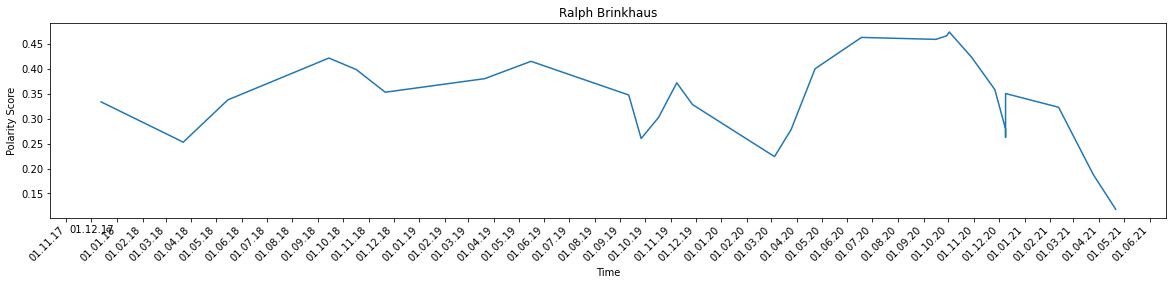

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


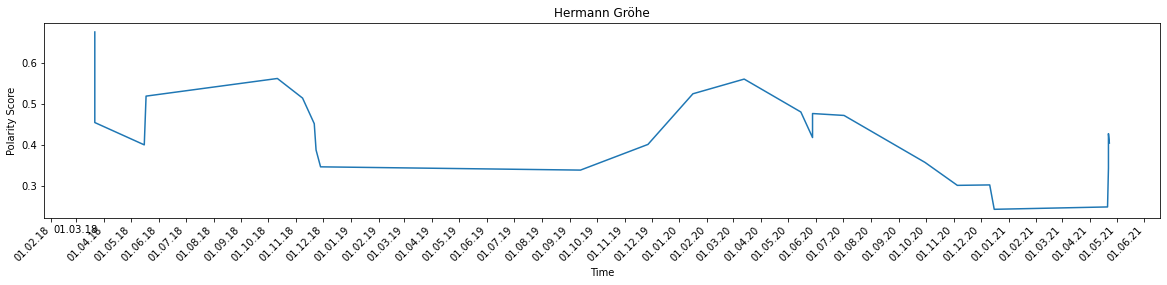

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


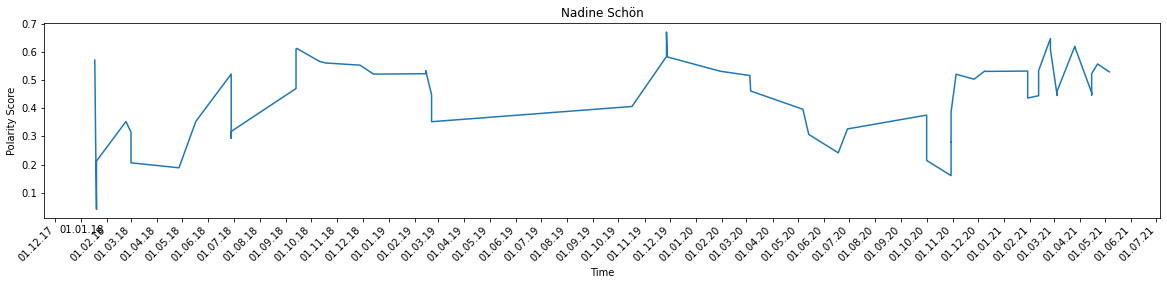

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


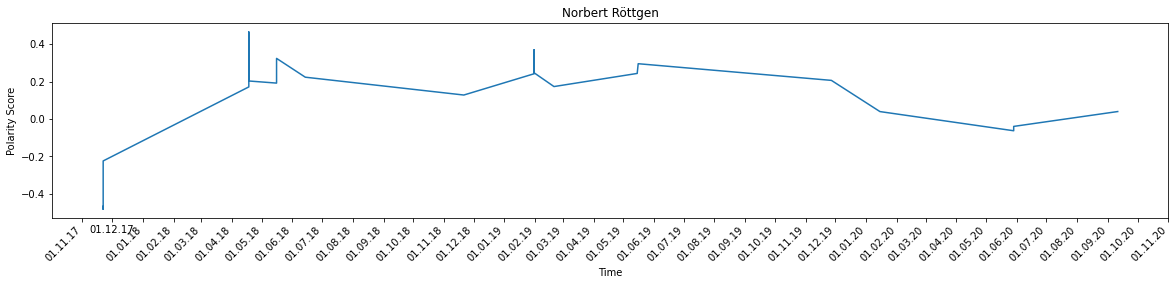

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


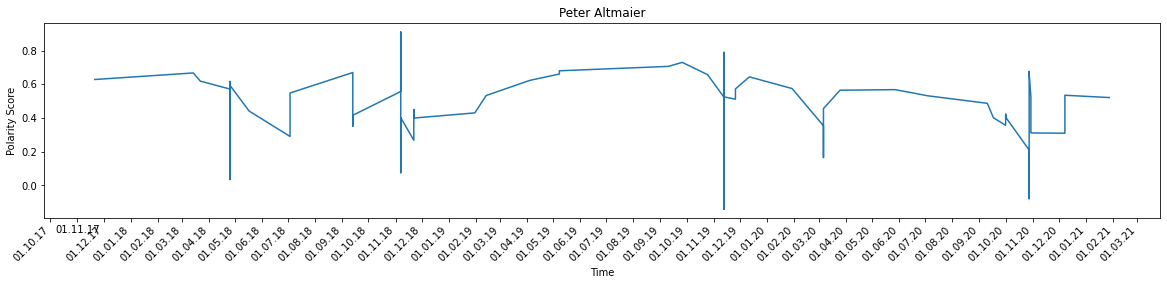

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


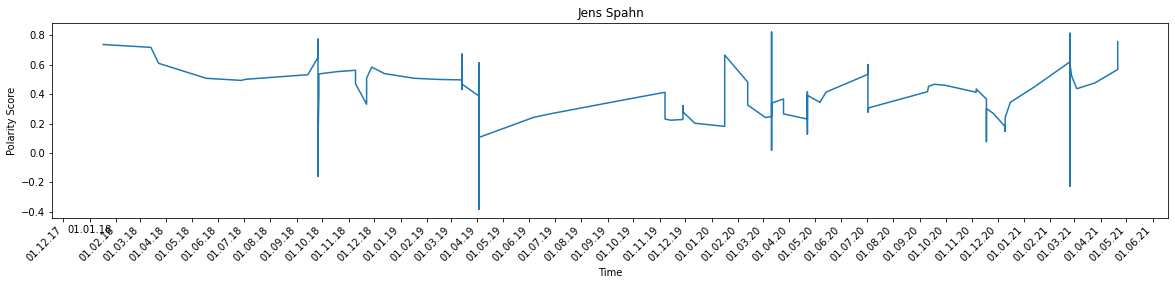

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


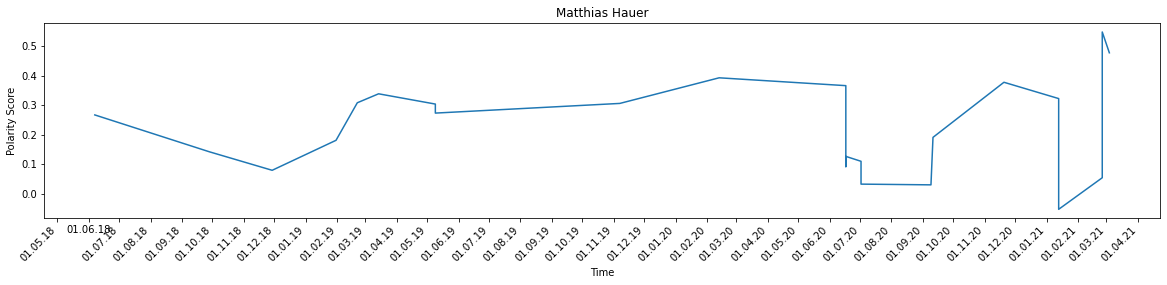

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


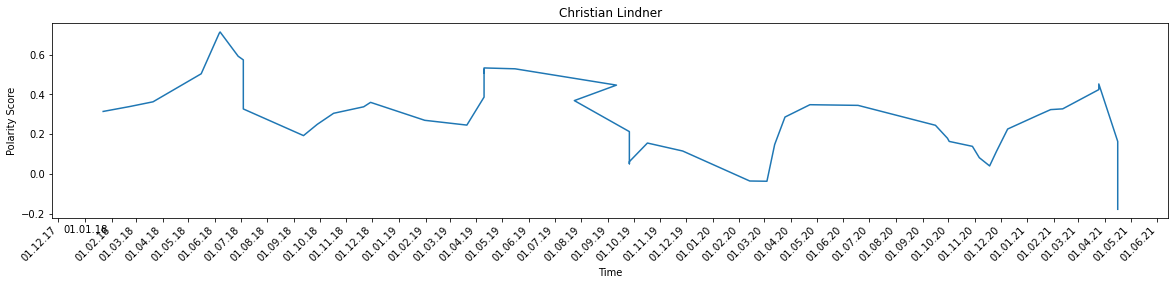

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


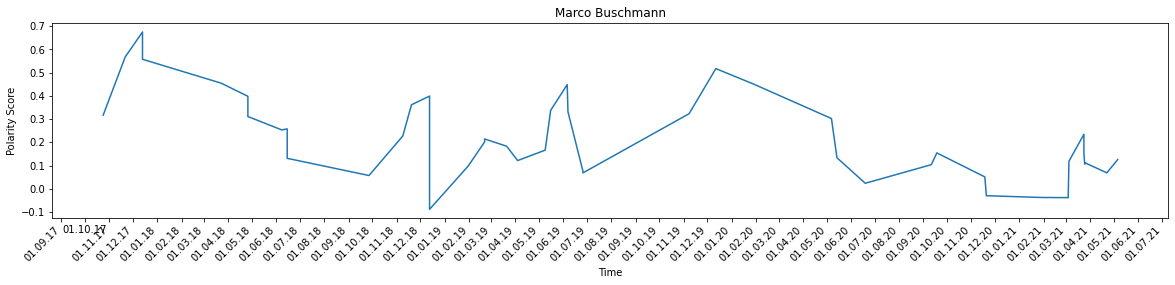

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


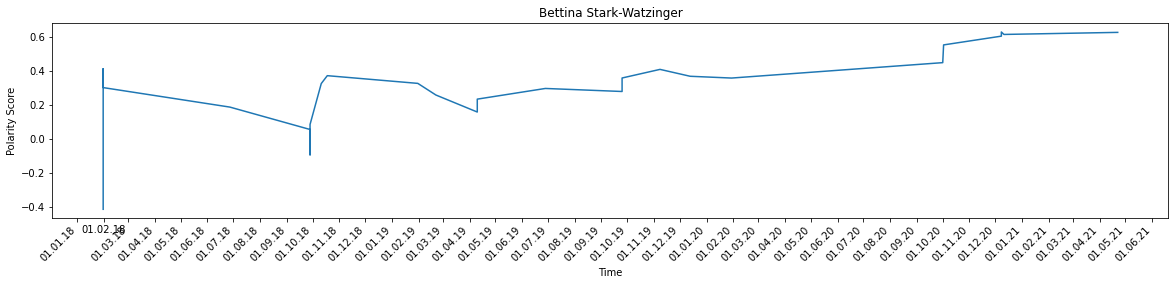

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


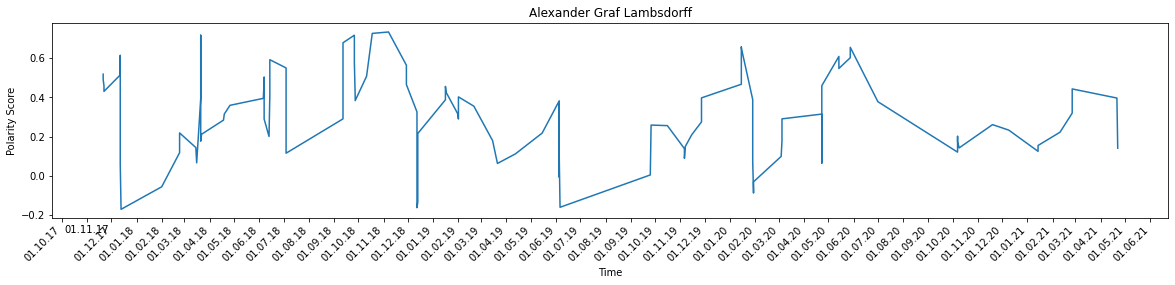

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


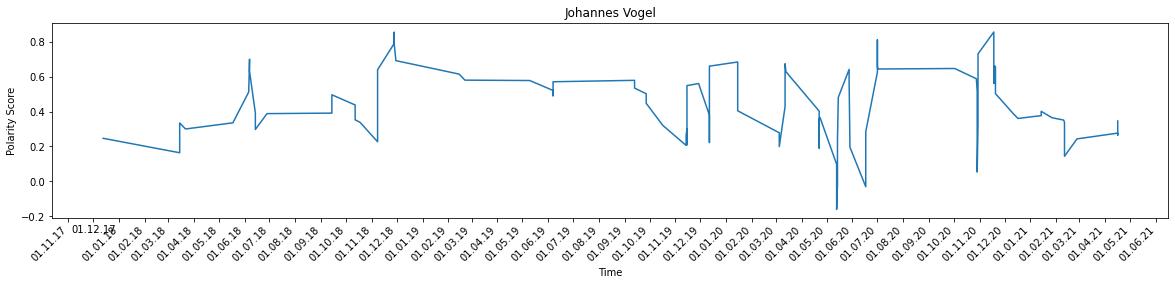

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


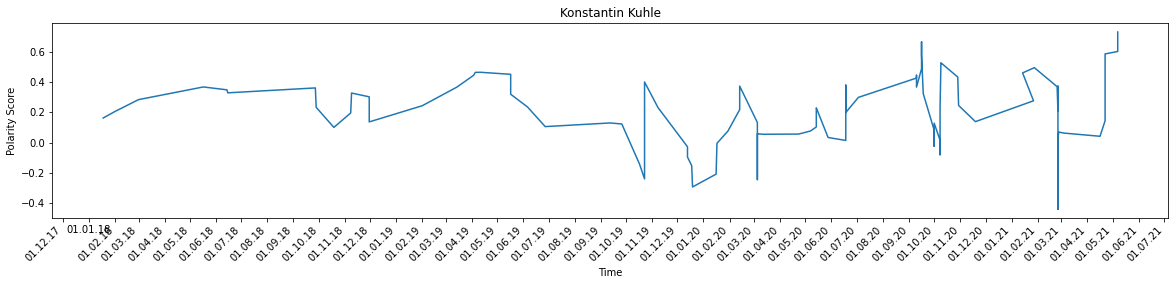

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


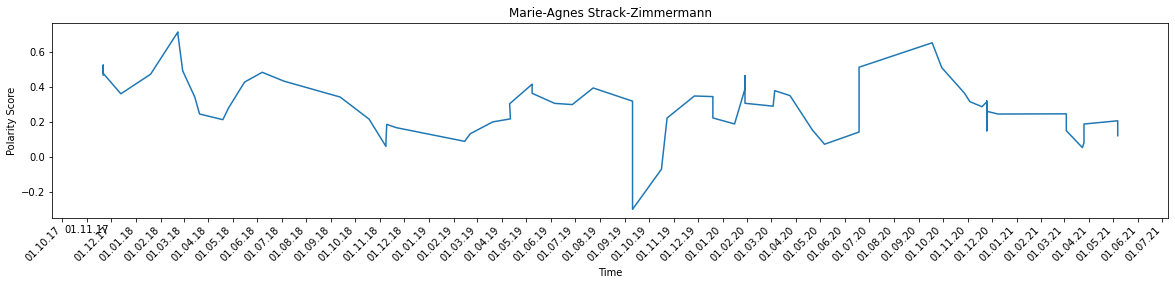

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


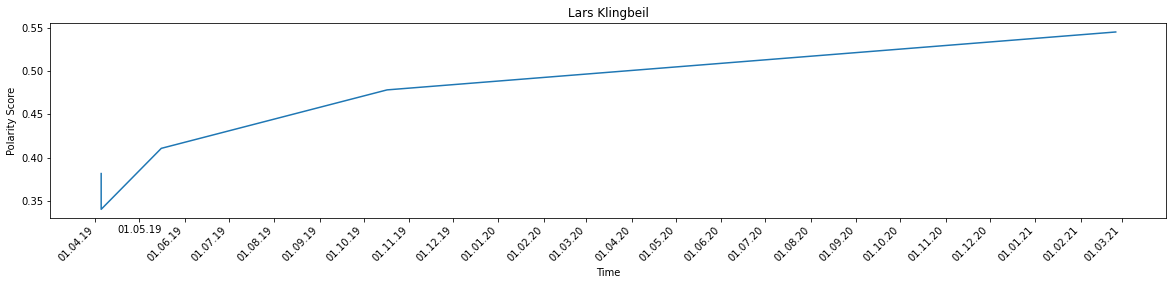

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


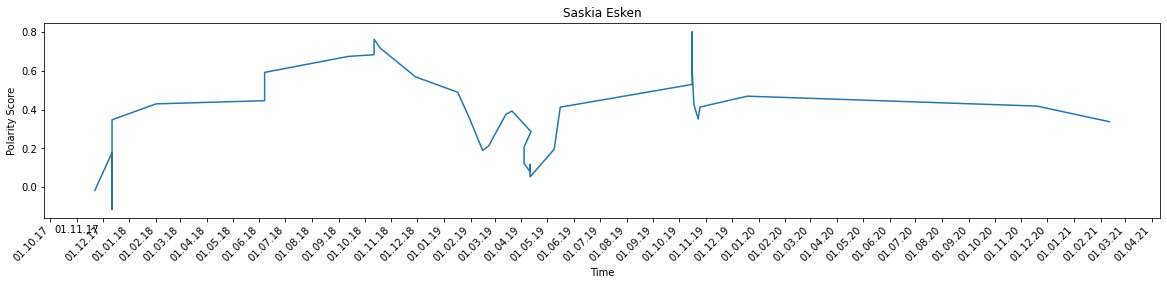

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


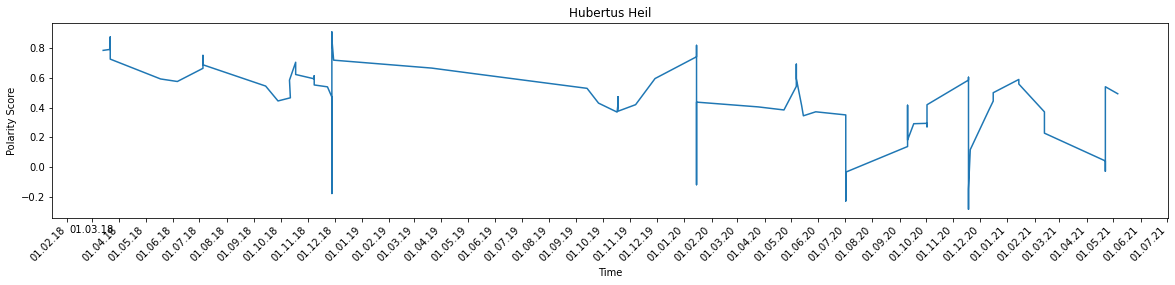

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


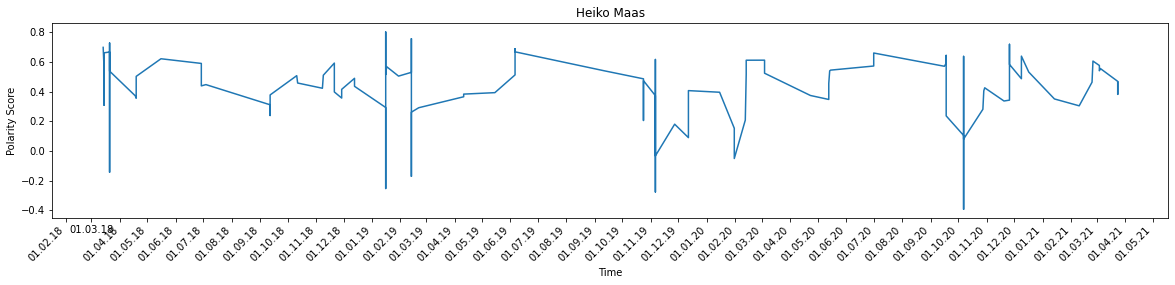

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


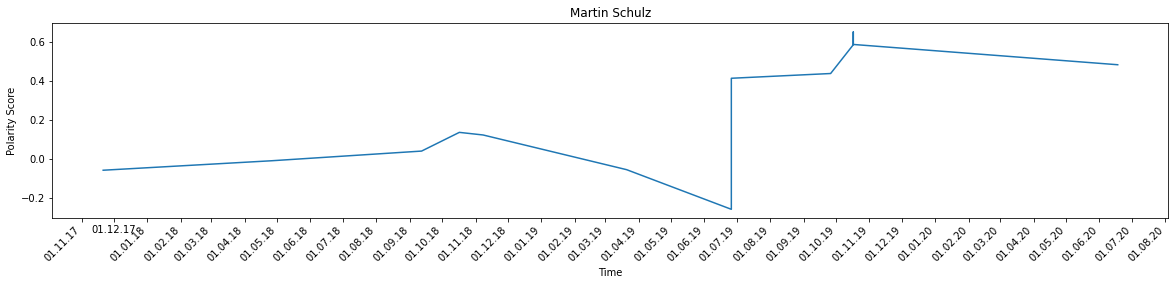

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


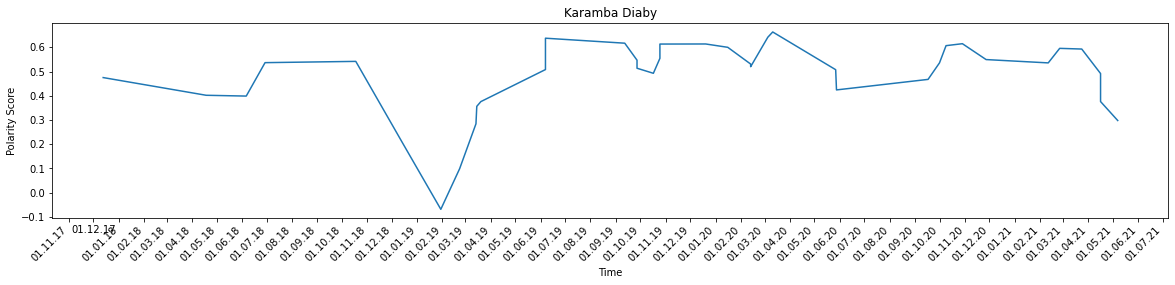

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


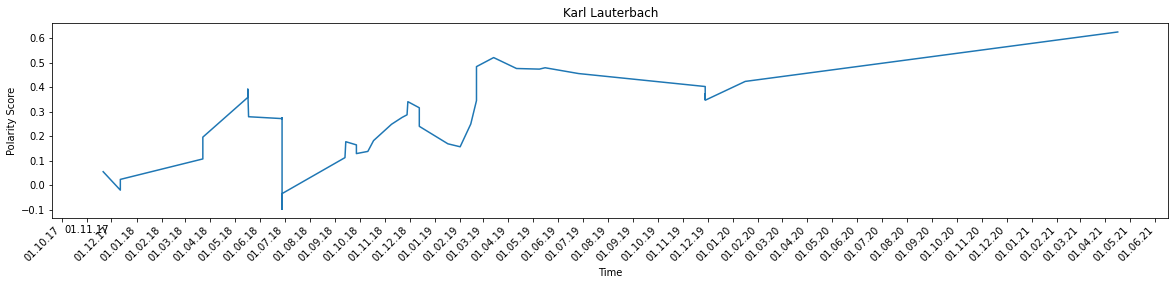

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


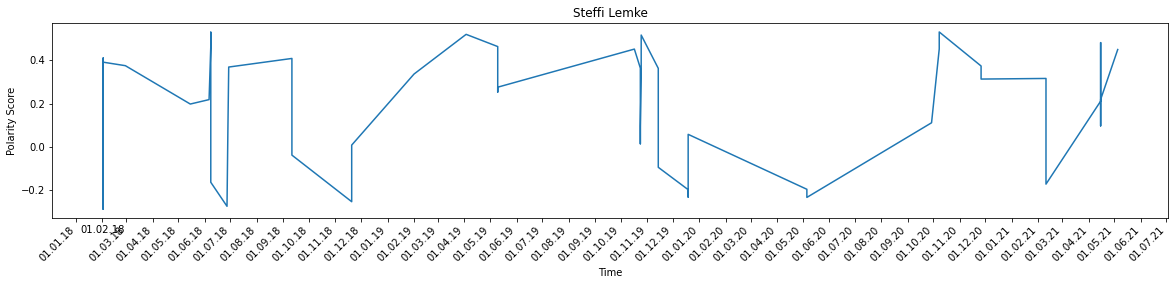

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


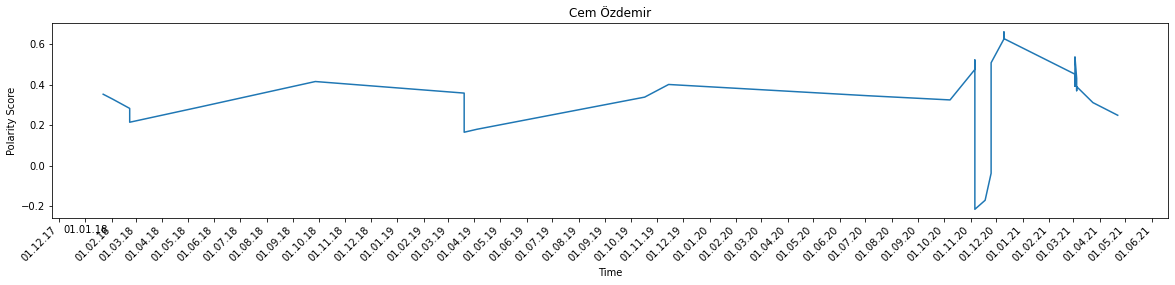

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


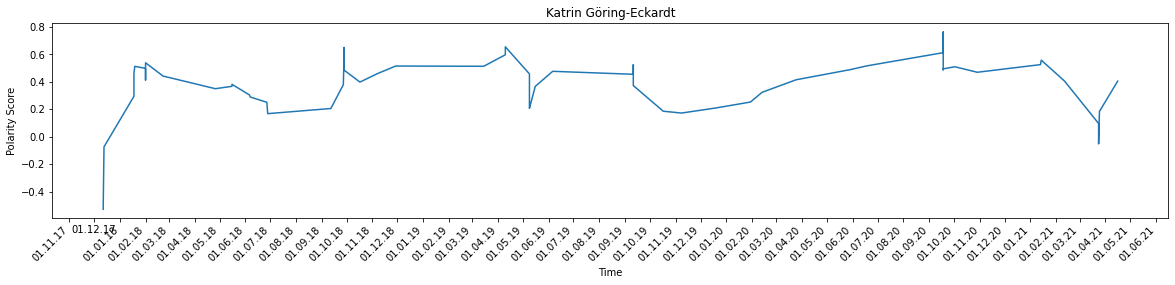

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


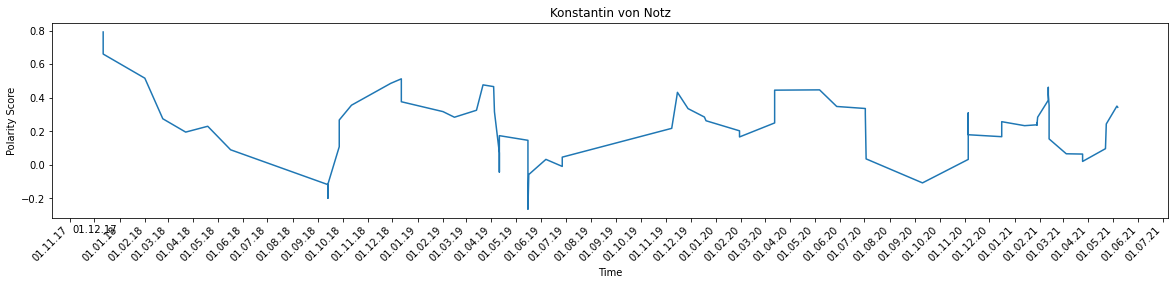

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


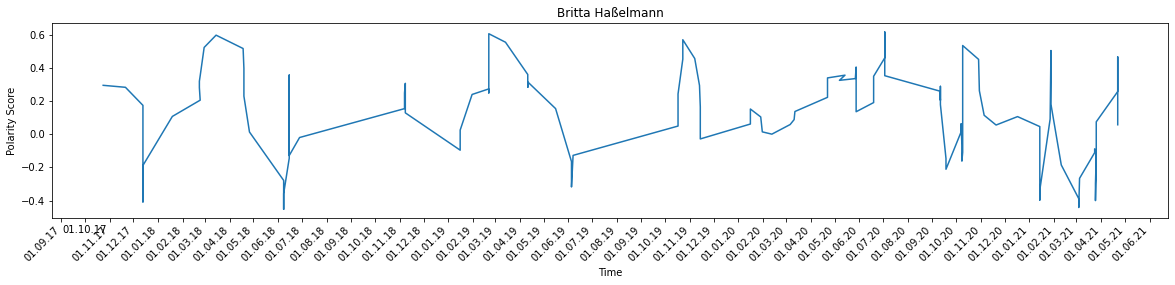

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


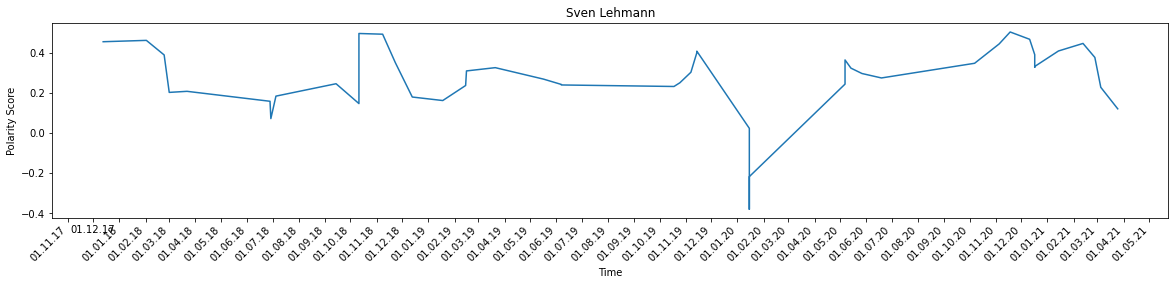

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


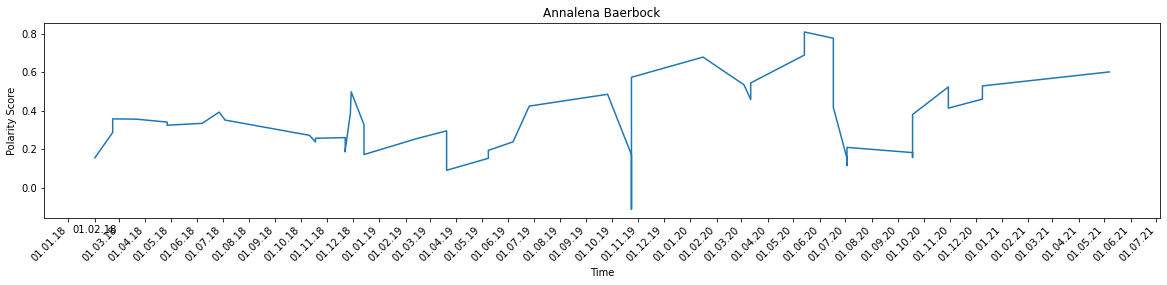

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


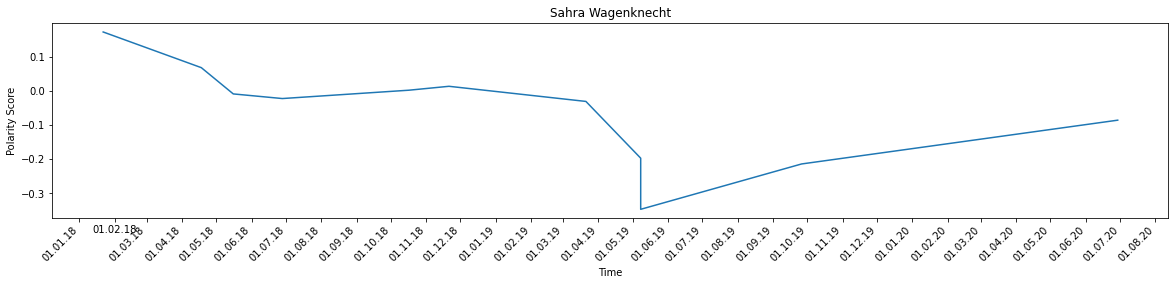

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


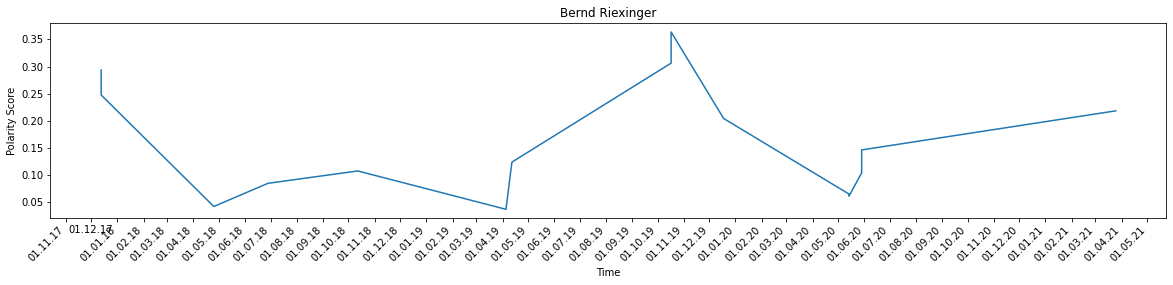

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


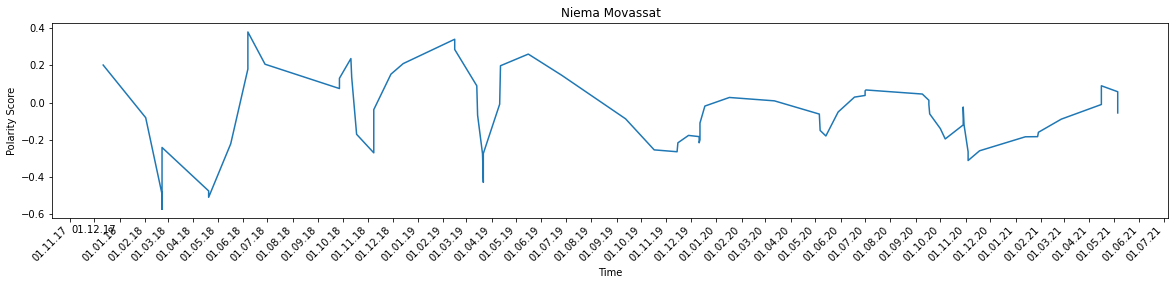

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


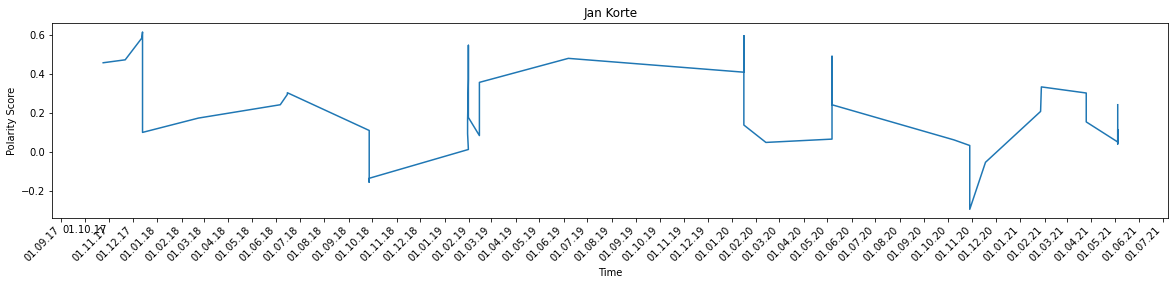

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


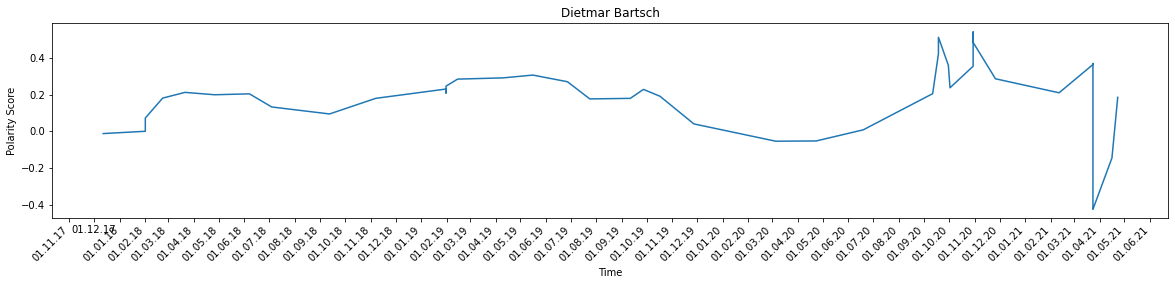

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


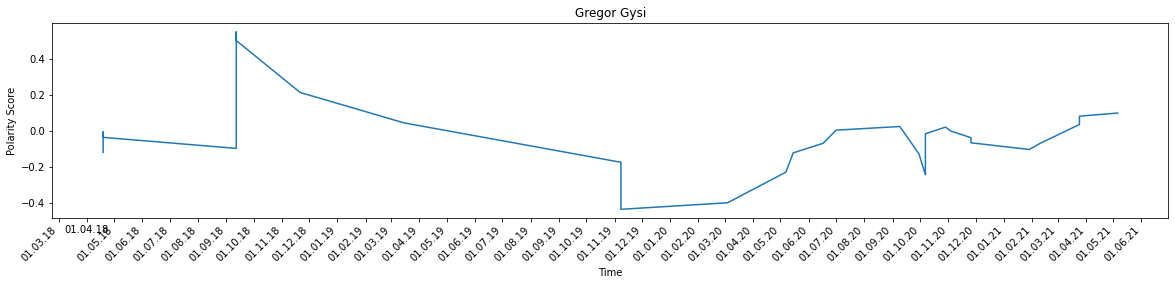

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


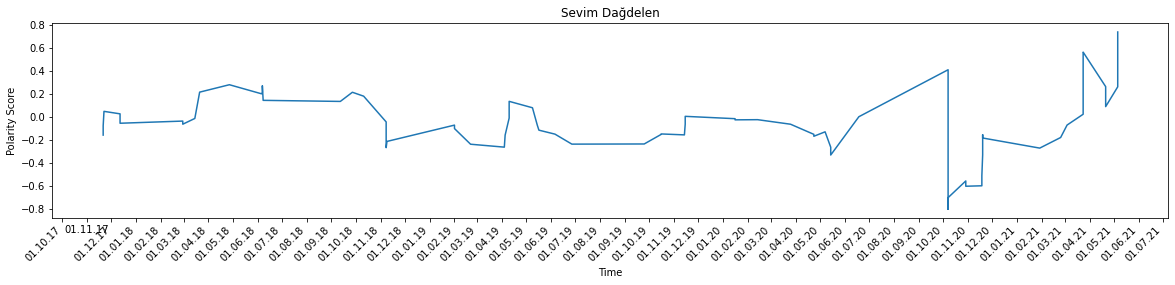

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


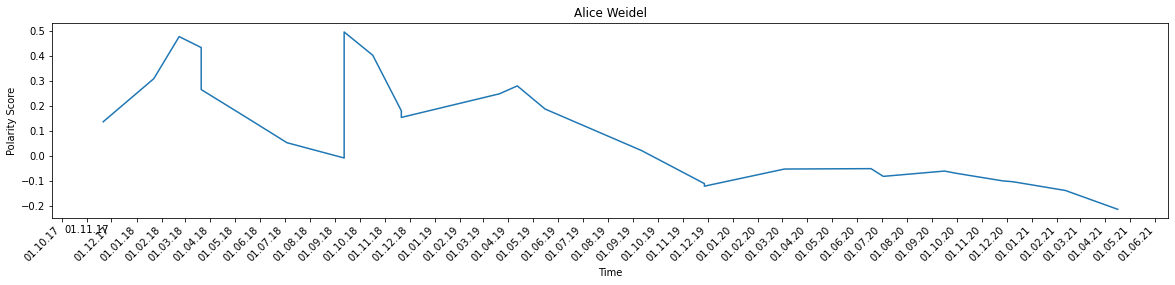

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


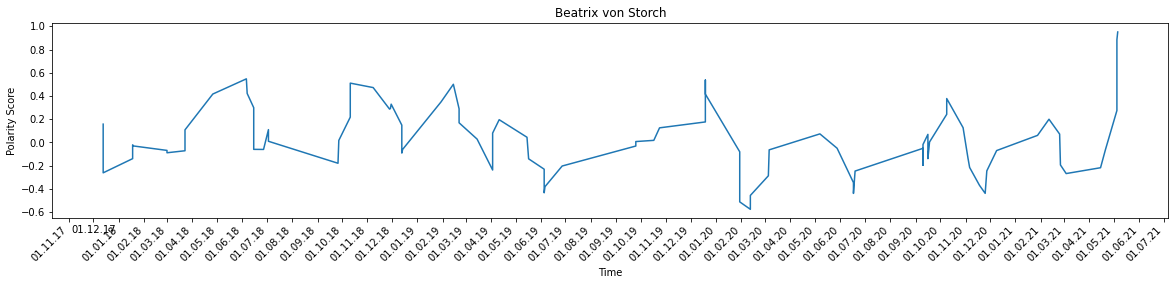

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


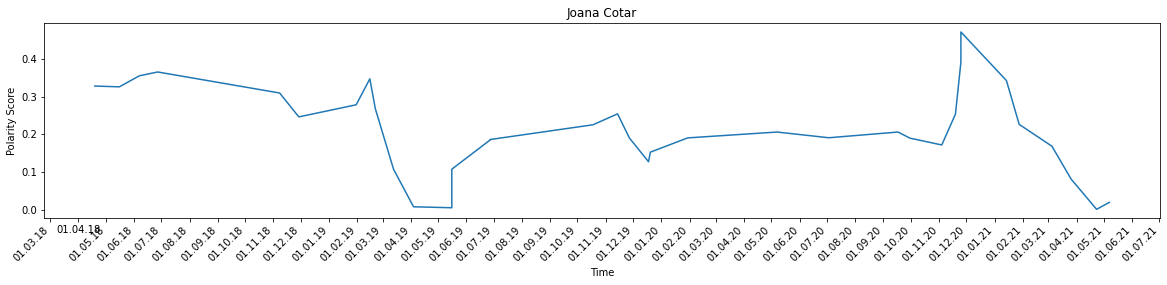

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


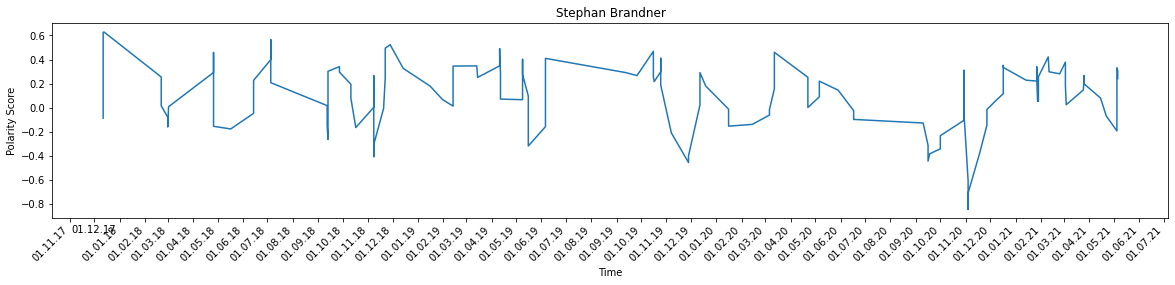

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


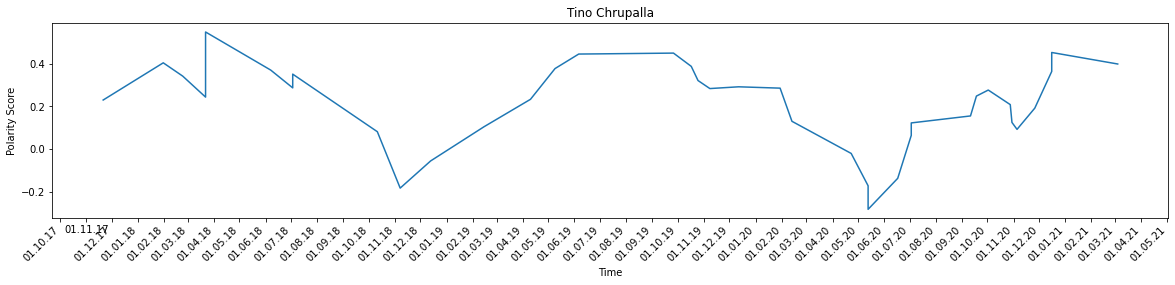

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


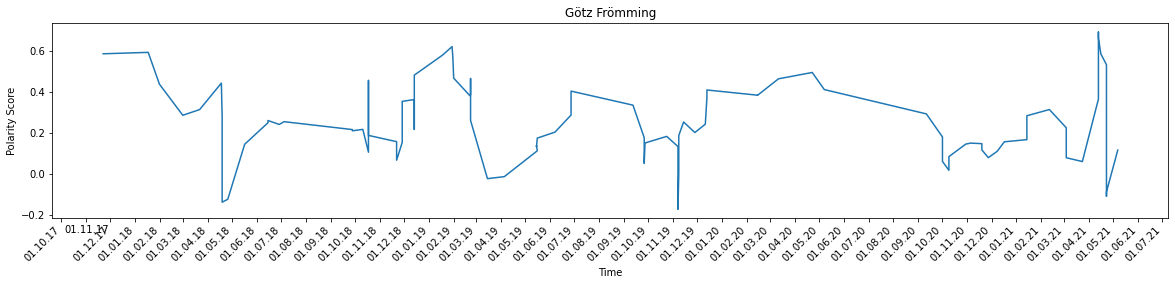

/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['polarity']=polarity
/var/folders/xy/yfm2dhtj3jvfy85hqy16wmk00000gn/T/ipykernel_7861/1237500744.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])


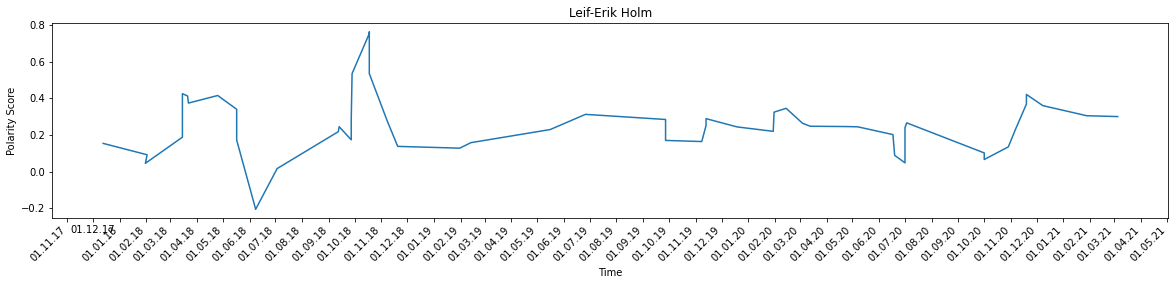

In [33]:
#plot the polarity of tweets over time
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

i=1
for name in tqdm(['Ralph Brinkhaus','Hermann Gröhe', 'Nadine Schön' ,'Norbert Röttgen' , 'Peter Altmaier' , 'Jens Spahn' , 'Matthias Hauer',
            'Christian Lindner' , 'Marco Buschmann' , 'Bettina Stark-Watzinger', 'Alexander Graf Lambsdorff' , 'Johannes Vogel' , 'Konstantin Kuhle' , 'Marie-Agnes Strack-Zimmermann',
            'Lars Klingbeil' , 'Saskia Esken' , 'Hubertus Heil' , 'Heiko Maas' , 'Martin Schulz' , 'Karamba Diaby' , 'Karl Lauterbach',
            'Steffi Lemke' , 'Cem Özdemir' , 'Katrin Göring-Eckardt' , 'Konstantin von Notz' , 'Britta Haßelmann' , 'Sven Lehmann' , 'Annalena Baerbock',
            'Sahra Wagenknecht' , 'Bernd Riexinger' , 'Niema Movassat' , 'Jan Korte' , 'Dietmar Bartsch' , 'Gregor Gysi' , 'Sevim Dağdelen',
            'Alice Weidel' , 'Beatrix von Storch' , 'Joana Cotar' , 'Stephan Brandner' , 'Tino Chrupalla' , 'Götz Frömming' , 'Leif-Erik Holm']):
    #get tweets from the specific politician and from the desired period
    tweets_analyzing =pre_data_speeches.loc[pre_data_speeches['full_name']==name]
    #tweets_analyzing1 =tweets_analyzing.loc[tweets_analyzing['Datetime']>='2017-10-24']
    #tweets_analyzing2 =tweets_analyzing1.loc[tweets_analyzing1['Datetime']<='2021-10-26']
    #preprocess the tweets
    test_tweets =tweets_analyzing.text_preprocessed
    #test_tweets = tweets.progress_apply(nlp_twitter)
    #create sentiment scores
    preprocess=[]
    for item in test_tweets:
        preprocess.append(' '.join([word for word in item]))

    preprocessed=pd.DataFrame(preprocess)

    blobs=tweets_analyzing['text_preprocessed_sentence'].apply(TextBlob)
    sentiment=[]
    for blob in blobs:
        sentiment.append(blob.sentiment)
    #get the scores
    polarity=[]
    for egg in sentiment:
        polarity.append(egg.polarity)
    #get the desired dates and convert timestamp
    tweets_analyzing['polarity']=polarity
    tweets_analyzing['date']=pd.to_datetime(tweets_analyzing['date'])

    dates=tweets_analyzing['date']
    values=tweets_analyzing['polarity']

    #smooth the curve, higher sigma means more smoothing
    if len(polarity)>18999:
        s=100
    elif len(polarity)>17999:
        s=95
    elif len(polarity)>16999:
        s=90
    elif len(polarity)>15999:
        s=85
    elif len(polarity)>14999:
        s=80
    elif len(polarity)>13999:
        s=75
    elif len(polarity)>12999:
        s=70
    elif len(polarity)>11999:
        s=65
    elif len(polarity)>10999:
        s=60
    elif len(polarity)>9999:
        s=55
    elif len(polarity)>8999:
        s=50
    elif len(polarity)>7999:
        s=45
    elif len(polarity)>6999:
        s=40
    elif len(polarity)>5999:
        s=35
    elif len(polarity)>4999:
        s=30
    elif len(polarity)>3999:
        s=25
    elif len(polarity)>2999:
        s=20
    elif len(polarity)>1999:
        s=15
    elif len(polarity)>1399:
        s=10
    else:
        s=2
    ysmoothed = gaussian_filter1d(values, sigma=s)

    fig = plt.figure(figsize=(20,200))
    ax = fig.add_subplot(42,1,i)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))    
    fig.autofmt_xdate(rotation=45)
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Polarity Score')
    plt.plot(dates, ysmoothed)
    plt.show()
    i +=1

In [34]:
blobs=pre_data_speeches['text_preprocessed_sentence'].apply(TextBlob)
sentiment=[]
for blob in blobs:
    sentiment.append(blob.sentiment)
#get the scores
polarity=[]
for egg in sentiment:
    polarity.append(egg.polarity)
pre_data_speeches['polarity_textblob'] = polarity

In [35]:
display(pre_data_speeches)



full_name        date  party  \
1114         Jan Korte  2017-10-24  Linke   
1115   Marco Buschmann  2017-10-24    FDP   
1116  Britta Haßelmann  2017-10-24  Grüne   
1117   Marco Buschmann  2017-11-21    FDP   
1118         Jan Korte  2017-11-21  Linke   
...                ...         ...    ...   
4094     Götz Frömming  2021-05-07    AFD   
4095     Karamba Diaby  2021-05-07    SPD   
4096       Joana Cotar  2021-05-07    AFD   
4097  Konstantin Kuhle  2021-05-07    FDP   
4098  Konstantin Kuhle  2021-05-07    FDP   

                                      text_preprocessed  \
1114  [herr, präsident, lieben, kollegin, kollege, g...   
1115  [herr, präsident, lieb, kollegin, kollege, kon...   
1116  [geehrt, herr, präsident, dame, herr, kern, de...   
1117  [herr, präsident, geehrt, kollegin, kollege, f...   
1118  [geehrt, herr, präsident, dame, herr, ernst, z...   
...                                                 ...   
4094  [erfahrung, pandemie, lernen, mal, konzept, ha...   
4095  [geehrt, frau, präsidentin, verehren, dame, he...   
4096  [frau, präsidentin, wert, kollege, stehen, mei...   
4097  [frau, präsidentin, dame, herr, coronakrise, m...   
4098  [beitragen, diskussionskultur, deutschland, st...   

                             text_preprocessed_sentence  polarity_textblob  
1114  herr präsident lieben kollegin kollege geehrt ...           0.512121  
1115  herr präsident lieb kollegin kollege konstitui...           0.061111  
1116  geehrt herr präsident dame herr kern debatte t...           0.231579  
1117  herr präsident geehrt kollegin kollege fraktio...           0.750000  
1118  geehrt herr präsident dame herr ernst zeit hum...           0.293333  
...                                                 ...                ...  
4094  erfahrung pandemie lernen mal konzept hausunte...           0.000000  
4095  geehrt frau präsidentin verehren dame herr kin...           0.241176  
4096  frau präsidentin wert kollege stehen meinungsf...           0.116000  
4097  frau präsidentin dame herr coronakrise massiv ...           0.100000  
4098  beitragen diskussionskultur deutschland stärke...           1.000000  

[2938 rows x 6 columns]